# Проект: E-commerce — Выявление профилей потребления

План проекта:

1. Цели исследования\
Предоставить комплексный анализ и рекомендации, которые позволят увеличить продажи и лояльность клиентов путем сегментированного маркетинга для интернет-магазин товаров для дома «Пока все ещё тут».

2. Предобработка данных
- Обработка пропусков и выбросов:\
Проверить данные на наличие пустых значений или некорректных записей.\
Проверить наличие дублей\
Удалить или скорректировать выбросы.
- Преобразование данных:\
Преобразовать дату в удобный формат для временного анализа.\
Выделить дополнительные признаки, такие как месяц, неделя, день недели.\
Выделить категории товаров из названий для дальнейшего анализа.\
Рассчитать общую стоимость покупок для каждого заказа.

3. Исследовательский анализ данных
- Общая характеристика данных:\
Распределение заказов и покупателей.\
Частота покупок на клиента.
- Динамика ключевых показателей:\
Выручка по месяцам.\
Средний чек и его изменения во времени.\
Динамика числа клиентов и заказов.
- Анализ товаров:\
Популярные категории товаров и их доля в выручке.\
Сезонность покупок по категориям.

4. Основные вопросы исследования

- Выделить основные показатели интернет-магазина\
● динамику выручки\
● средний чек и его динамику\
● помесячную динамику средней выручки с покупателя\

- Сегментировать покупателей на основе истории их покупок\
● сегментация покупателей\
● анализ сегментов (количество покупателей, средний чек, основные продукты и категории)\
● анализ категорий товаров и их сезонность по выделенным сегментам покупателей\

5. Сегментация покупателей

- Выделить группы клиентов 

- Анализ сегментов:\
● Выделить количество клиентов в каждом сегменте.\
● Средний чек по сегменту.\
● Основные категории товаров, покупаемых клиентами каждого сегмента.\
● Сезонность покупок по сегментам

6. Проверка гипотез

Гипотеза 1: Средний чек отличается между сегментами клиентов\
H0 (нулевая гипотеза): Средний чек клиентов из сегмента A, сегмента Б и сегмента C не отличается (например, средний чек между всеми сегментами равен)\
H1 (альтернативная гипотеза): Средний чек клиентов из хотя бы одного сегмента отличается от других

Гипотеза 2: Выручка отличается между сегментами клиентов\
H0 (нулевая гипотеза): Выручка от  клиентов из сегмента A, сегмента Б и сегмента C не отличается (например, выручка между всеми сегментами равен)\
H1 (альтернативная гипотеза): Выручка клиентов из хотя бы одного сегмента отличается от других

Гипотеза 3: Средняя стоимость товара отличается между сегментами\
H0 (нулевая гипотеза): Распределение среднего стоимости товаров одинаково для сегментов A, Б и C\
H1 (альтернативная гипотеза): Распределение средней стоимости товаров различается хотя бы в одном сегменте


7. Рекомендации
- Маркетинговые рекомендации
- Стратегия увеличения продаж
- Стратегия повышения лояльности


# 1 Цели иследования

Цель исследования:  Предоставить комплексный анализ и рекомендации, которые позволят увеличить продажи и лояльность клиентов путем сегментированного маркетинга для интернет-магазин товаров для дома «Пока все ещё тут».

Задачи:
    
- Сегментировать покупателей интернет-магазина по профилю потребления.
- Определить ключевые показатели работы магазина (выручка, средний чек, динамика по клиентам).
- Провести исследовательский анализ данных для выявления основных закономерностей в покупательском поведении.
- Выработать рекомендации для маркетинга, увеличения продаж и повышения лояльности клиентов.

# Загружаем данные и изучаем общую информацию

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                                         
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from pymystem3 import Mystem                                
from collections import Counter   
 
from scipy.stats import mannwhitneyu
import statsmodels.stats.multitest as multitest


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 100)
# Отключение научного формата для Pandas
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [4]:
data.head(15)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674


In [5]:
# сразу приведем дату в нужный формат
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [6]:
data = data.sort_values(by='order_id')

In [7]:
data.head(10)

,date,customer_id,order_id,product,quantity,price
4341,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 50-100 см",1,225
4340,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 25-50 см",1,150
588,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315
589,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207
590,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162
759,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207
760,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162
816,2018-11-15 15:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315
817,2018-11-15 15:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207
818,2018-11-15 15:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162


In [8]:
# Получаем информацию по типам данных каждого столбца
column_types = data.dtypes
print("\nТипы данных по столбцам:\n", column_types)

# Подсчитываем количество уникальных значений по каждому столбцу
column_uniques = data.nunique()
print("\nКоличество уникальных значений в каждом столбце:\n", column_uniques)

# Получаем статистическое описание данных
column_descriptions = data.describe(include='all')
display("Статистическое описание данных:", column_descriptions)


Типы данных по столбцам:
 date           datetime64[ns]
customer_id            object
order_id                int64
product                object
quantity                int64
price                 float64
dtype: object

Количество уникальных значений в каждом столбце:
 date           3126
customer_id    2451
order_id       3521
product        2343
quantity         49
price           407
dtype: int64


'Статистическое описание данных:'

,date,customer_id,order_id,product,quantity,price
count,7474,7474,"7,474",7474,"7,474","7,474"
unique,3126,2451,NaN,2343,NaN,NaN
top,2019-04-27 16:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,NaN,Рассада Кабачка сорт Зебра кассета 6 шт E6,NaN,NaN
freq,51,888,NaN,79,NaN,NaN
first,2018-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2020-01-31 15:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,"49,450",NaN,2,479
std,NaN,NaN,"32,680",NaN,15,902
min,NaN,NaN,"12,624",NaN,1,9
25%,NaN,NaN,"14,833",NaN,1,97


Описание данных:
Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока
все ещё тут».

Название колонок:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара

На данный момент, мы видим что информация о 7474 заказах, в период с 01.10.2018 до 31.01.2020. Необходимо проверить максимальное количество заказов в 1000, и максимальную стоимость товара в 14 тысяч. 

Типы данных соответствуют.

# 3. Выполним предобработку данных

## Обработка пропусков, дубликатов и выбросов

Проверка данных на наличие пустых значений

In [9]:
print("Количество пропусков в каждом столбце:")
print(data.isnull().sum())

Количество пропусков в каждом столбце:
date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


Проверка и удаление дубликатов

In [10]:
duplicate_count = data.duplicated().sum()
print("Количество дубликатов до удаления:", duplicate_count)

Количество дубликатов до удаления: 0


Проверим неявные дубликаты

In [11]:
data['product'] = data['product'].str.upper().str.strip()

In [12]:
# Группировка: количество строк на заказ
grouped_orders = data.groupby('order_id').agg(user_count=('customer_id', 'count')).reset_index()
filtered_orders_user_count2= grouped_orders[grouped_orders['user_count'] > 1]
filtered_orders_user_count2.sort_values(by='user_count', ascending=False).head(10)

,order_id,user_count
221,14833,888
222,14835,203
164,14753,90
266,14897,63
1658,70960,60
137,14698,51
502,68760,50
145,14715,36
14,14500,34
129,14688,31


Мы види что на один заказ может быть несколько строк, нужно проверить эти дынные. 

Используя прецентили, посмотрим как распределется количество строк с одним номером заказа.

In [13]:
percentiles = np.percentile(filtered_orders_user_count2['user_count'], [90, 95, 99])
percentiles

array([11.  , 17.  , 44.96])

In [14]:
p90, p95, p99 = percentiles

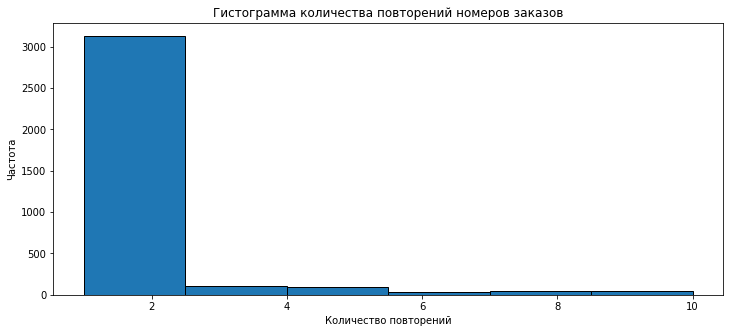

In [15]:
check_order_id_2 = grouped_orders.query('user_count < @p90')

plt.figure(figsize=(12, 5))
plt.hist(check_order_id_2['user_count'], bins=6, edgecolor='black')
plt.title('Гистограмма количества повторений номеров заказов')
plt.xlabel('Количество повторений')
plt.ylabel('Частота')
plt.show()

Мы видим что большая количество заказов повторяется до 10 раз ( 10 строк)

Айди заказа это уникальное число, большое количество повторений выглядит подозрительно, нужно посмотреть что это за данные

Есть впероятность, что при добавлении товара заказ дублируется, нужно уточнить этот момент у тех. отдела. На данный момент возможно лучше эти данные исключить

In [16]:
unicue_users = data.groupby('order_id')['customer_id'].nunique().reset_index()
unicue_users.sort_values(by = 'customer_id', ascending = False).head(10)

,order_id,customer_id
2610,72845,4
1914,71480,3
902,69485,3
862,69410,2
1799,71226,2
797,69283,2
2677,72950,2
1495,70631,2
933,69531,2
1066,69833,2


In [17]:
np.percentile(unicue_users['customer_id'], [90, 95, 99])

array([1., 1., 1.])

In [18]:
unicue_users.describe()

,order_id,customer_id
count,"3,521","3,521"
mean,"73,564",1
std,"23,340",0
min,"12,624",1
25%,"69,443",1
50%,"71,156",1
75%,"72,896",1
max,"112,789",4


Мы видим что меньше чем у 1 % данных, на 1 заказ больше 1 уникального пользователя. Эти данные мы можем поробовать убрать

Удаляем заказы, для которых больше 1 уникального пользователя

In [19]:
data_shape = data.shape[0]
data_shape

7474

In [20]:
df_clean = data
delet = unicue_users.loc[unicue_users['customer_id'] < 2]

In [21]:
df_clean = df_clean[df_clean['order_id'].isin(delet['order_id'])]

In [22]:
df_clean.head(5)

,date,customer_id,order_id,product,quantity,price
4341,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"ОСИНА ОБЫКНОВЕННАЯ, ВЫСОТА 50-100 СМ",1,225
4340,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"ОСИНА ОБЫКНОВЕННАЯ, ВЫСОТА 25-50 СМ",1,150
588,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,РАССАДА ЗЕЛЕНИ ДЛЯ КУХНИ ЛАВАНДЫ В КАССЕТЕ ПО 6 ШТ,1,315
589,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,РАССАДА ЗЕЛЕНИ ДЛЯ КУХНИ РОЗМАРИНА В КАССЕТЕ ПО 6 ШТ,1,207
590,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,РАССАДА ЗЕЛЕНИ ДЛЯ КУХНИ ТИМЬЯНА В КАССЕТЕ ПО 6 ШТ,1,162


In [23]:
df_clean_shape = df_clean.shape[0]
df_clean_shape

7385

In [24]:
q = (data_shape - df_clean_shape) / data_shape * 100
q

1.1907947551511908

1,2% данных  это допустимые потери

In [25]:
df_clean.describe()

,order_id,quantity,price
count,"7,385","7,385","7,385"
mean,"49,261",2,474
std,"32,778",15,894
min,"12,624",1,9
25%,"14,833",1,97
50%,"68,760",1,135
75%,"71,253",1,434
max,"112,789","1,000","14,917"


Пока проверим остальнные данные

In [26]:
# Считаем количество уникальных клиентов по каждому заказу
unique_customers = df_clean.groupby('order_id')['customer_id'].nunique()

# Считаем количество уникальных дат по каждому заказу
unique_dates = df_clean.groupby('order_id')['date'].nunique()

# Объединяем результаты в один DataFrame
pivot_table = pd.DataFrame({
    'unique_customers': unique_customers,
    'unique_dates': unique_dates
})

# Вывод результата
print(pivot_table.sort_values(by='unique_dates', ascending=False ).head(20))

          unique_customers  unique_dates
order_id                                
14833                    1            74
70960                    1            60
69162                    1            23
71148                    1            16
70419                    1            10
71463                    1             9
69527                    1             9
70962                    1             8
70620                    1             7
13547                    1             7
71341                    1             7
14835                    1             7
69694                    1             6
69598                    1             6
14521                    1             6
72066                    1             6
70115                    1             5
72518                    1             5
70356                    1             5
72720                    1             5


In [27]:
pivot_table.describe()

,unique_customers,unique_dates
count,"3,492","3,492"
mean,1,1
std,0,2
min,1,1
25%,1,1
50%,1,1
75%,1,1
max,1,74


In [28]:
np.percentile(pivot_table['unique_dates'], [90, 95, 99])

array([1., 2., 4.])

Развдоение заказа появляется при добавлении второй и так далее штуки товара. И новый айди наиболее вероятно это техническая ошибка

Мы видим, что около 5% заказов имебт больше 2-х дата. Это  так же заказы, в которых произошло задвоение при увеличении количества позиций

Ввзять последнию дату добавления товара за основную. Так же в тех заказах где два айди покупателя оставить один. Возьмем за основу что номер заказа - точно верен.

In [29]:
# Найдем последнюю дату для каждого order_id
latest_dates = df_clean.groupby('order_id')['date'].max().reset_index()

# Объединяем данные для обновления даты в основном DataFrame
final_orders = df_clean.merge(latest_dates, on='order_id', suffixes=('', '_latest'))

# Обновляем "date" на "date_latest"
final_orders['date'] = final_orders['date_latest']

# Удаляем временный столбец
final_orders.drop(columns=['date_latest'], inplace=True)

In [30]:
order_id_72720 = data.query('order_id == 72720')
order_id_72720

,date,customer_id,order_id,product,quantity,price
6393,2019-09-22 11:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,БЛЮДО PASABAHCE СЕРИЯ КОНЬЯ ДИАМЕТР 354 ММ 54372B,1,262
6394,2019-09-22 12:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,БЛЮДО PASABAHCE СЕРИЯ КОНЬЯ ДИАМЕТР 354 ММ 54372B,1,262
6395,2019-09-22 13:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,БЛЮДО PASABAHCE СЕРИЯ КОНЬЯ ДИАМЕТР 354 ММ 54372B,1,262
6402,2019-09-22 16:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,БЛЮДО PASABAHCE СЕРИЯ КОНЬЯ ДИАМЕТР 354 ММ 54372B,1,262
6398,2019-09-22 14:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,БЛЮДО PASABAHCE СЕРИЯ КОНЬЯ ДИАМЕТР 354 ММ 54372B,1,262


Даты поменяли, все остально осталось прежним

In [31]:
# Считаем количество уникальных клиентов по каждому заказу
unique_customers = final_orders.groupby('order_id')['customer_id'].nunique()

# Считаем количество уникальных дат по каждому заказу
unique_dates = final_orders.groupby('order_id')['date'].nunique()

# Объединяем результаты в один DataFrame
pivot_table = pd.DataFrame({
    'unique_customers': unique_customers,
    'unique_dates': unique_dates
})

# Вывод результата
print(pivot_table.sort_values(by='unique_dates', ascending=False ).head(20))

          unique_customers  unique_dates
order_id                                
12624                    1             1
72339                    1             1
72325                    1             1
72327                    1             1
72329                    1             1
72330                    1             1
72331                    1             1
72332                    1             1
72333                    1             1
72335                    1             1
72336                    1             1
72337                    1             1
72338                    1             1
72343                    1             1
72370                    1             1
72346                    1             1
72349                    1             1
72350                    1             1
72355                    1             1
72357                    1             1


 Теперь еще раз посмотрим какие есть ли выбросы

In [32]:
final_orders.describe()

,order_id,quantity,price
count,"7,385","7,385","7,385"
mean,"49,261",2,474
std,"32,778",15,894
min,"12,624",1,9
25%,"14,833",1,97
50%,"68,760",1,135
75%,"71,253",1,434
max,"112,789","1,000","14,917"


In [33]:
percentiles = np.percentile(final_orders['quantity'], [90, 95, 99])
p90, p95, p99 = percentiles

In [34]:
final_orders.query('quantity > @p90').sort_values(by = 'quantity',ascending = False).head(10)

,date,customer_id,order_id,product,quantity,price
5814,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"ВАНТУЗ С ДЕРЕВЯННОЙ РУЧКОЙ D14 СМ КРАСНЫЙ, BURSTENMANN, 0522/0000",1000,675
5774,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,ВЕШАЛКИ МЯГКИЕ ДЛЯ ДЕЛИКАТНЫХ ВЕЩЕЙ 3 ШТ ШОКОЛАД,334,148
5672,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,300,51
4296,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"РУЧКА-СКОБА РС-100 БЕЛАЯ *ТРИБАТРОН*, 1108035",200,29
3778,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,МУЛЯЖ ЯБЛОКО 9 СМ КРАСНОЕ,170,51
3501,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"КРЕПЕЖ ДЛЯ ПРУЖИНЫ ДВЕРНОЙ, 1107055",150,19
3498,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"КРЕПЕЖ ДЛЯ ПРУЖИНЫ ДВЕРНОЙ, 1107055",150,19
5214,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,ПЛЕЧИКИ ПЛАСТМАССОВЫЕ РАЗМЕР 52 - 54 ТУЛА 1205158,150,20
3499,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"ПРУЖИНА ДВЕРНАЯ 240 ММ ОЦИНКОВАННАЯ (Д-19 ММ) БЕЗ КРЕПЛЕНИЯ, 1107014",150,38
3500,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"ПРУЖИНА ДВЕРНАЯ 240 ММ ОЦИНКОВАННАЯ (Д-19 ММ) БЕЗ КРЕПЛЕНИЯ, 1107014",150,38


1000 вантусов выглядят подозрительно, позже удалим, возможно это и не техническая ошибка, но будет искажать анализ

In [35]:
data_shape_2 = final_orders.shape[0]
data_shape_2

7385

In [36]:
final_orders = final_orders[final_orders['order_id'] != 71743]

In [37]:
final_orders.describe()

,order_id,quantity,price
count,"7,384","7,384","7,384"
mean,"49,258",2,474
std,"32,779",9,894
min,"12,624",1,9
25%,"14,833",1,97
50%,"68,760",1,135
75%,"71,252",1,434
max,"112,789",334,"14,917"


In [38]:
final_orders_shape = final_orders.shape[0]
final_orders_shape

7384

In [39]:
shape = (data_shape_2 - final_orders_shape) / data_shape * 100
shape

0.01337971635001338

Данных ушло низначительно

Проверим стоимость одного товара

In [40]:
np.percentile(final_orders['price'], [90, 95, 99])
p90, p95, p99 = percentiles

In [41]:
unique_products = final_orders.query('price > @p90').sort_values(by='price', ascending=False).drop_duplicates(subset='product')
unique_products.head(10)

,date,customer_id,order_id,product,quantity,price
6046,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,СУШИЛКА УЛИЧНАЯ LEIFHEIT 85210 LINOMATIC V 400 40 М 175Х237Х237 СМ ЗЕЛЕНАЯ,1,"14,917"
5396,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ANDERSEN ROYAL SHOPPER, HERA, СИНЯЯ 166-004-90",1,"8,737"
4956,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ANDERSEN ALU STAR SHOPPER, HAVA, СИНЯЯ 115-103-90",1,"8,437"
7171,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MNB019 ROJO LOGIC DOS+2 КРАСНАЯ,1,"8,077"
6549,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,СТРЕМЯНКА 7 СТУПЕНЧАТАЯ HAILO 8040-707 XXL 13 СМ АЛЮМИНИЕВАЯ С ЛОТКОМ ДЛЯ ИНСТРУМЕНТОВ,1,"7,724"
5155,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER IMX006 BASSI LOGIC TOUR БОРДОВАЯ,1,"7,679"
6047,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MNB017 FUCSIA LOGIC DOS+2 ФУКСИЯ,1,"7,679"
3857,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MOU041 MALVA RD6 СИРЕНЕВАЯ,1,"7,597"
4365,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,ГЛАДИЛЬНАЯ ДОСКА LEIFHEIT AIRBOARD COMPACT M PLUS 120Х38 СМ МАЛИНОВЫЙ 71630,1,"7,424"
6183,2019-08-23 12:00:00,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,УРНА УЛИЧНАЯ СТАЛЬНАЯ САЛЬВАДОР 02.021.0 46Х110 СМ,1,"7,349"


In [42]:
# Вычисляем 90-й перцентиль цен
percentile_90 = final_orders['price'].quantile(0.9)

# Фильтруем товары с использованием динамического значения процентиля
unique_products = (
    final_orders
    .query('price > @percentile_90')
    .sort_values(by='price', ascending=False)
    .drop_duplicates(subset='product')
)

# Вывод первых 10 строк
unique_products.head(10)

,date,customer_id,order_id,product,quantity,price
6046,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,СУШИЛКА УЛИЧНАЯ LEIFHEIT 85210 LINOMATIC V 400 40 М 175Х237Х237 СМ ЗЕЛЕНАЯ,1,"14,917"
5396,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ANDERSEN ROYAL SHOPPER, HERA, СИНЯЯ 166-004-90",1,"8,737"
4956,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ANDERSEN ALU STAR SHOPPER, HAVA, СИНЯЯ 115-103-90",1,"8,437"
7171,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MNB019 ROJO LOGIC DOS+2 КРАСНАЯ,1,"8,077"
6549,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,СТРЕМЯНКА 7 СТУПЕНЧАТАЯ HAILO 8040-707 XXL 13 СМ АЛЮМИНИЕВАЯ С ЛОТКОМ ДЛЯ ИНСТРУМЕНТОВ,1,"7,724"
6047,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MNB017 FUCSIA LOGIC DOS+2 ФУКСИЯ,1,"7,679"
5155,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER IMX006 BASSI LOGIC TOUR БОРДОВАЯ,1,"7,679"
3857,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,СУМКА-ТЕЛЕЖКА ХОЗЯЙСТВЕННАЯ ROLSER MOU041 MALVA RD6 СИРЕНЕВАЯ,1,"7,597"
4365,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,ГЛАДИЛЬНАЯ ДОСКА LEIFHEIT AIRBOARD COMPACT M PLUS 120Х38 СМ МАЛИНОВЫЙ 71630,1,"7,424"
6183,2019-08-23 12:00:00,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,УРНА УЛИЧНАЯ СТАЛЬНАЯ САЛЬВАДОР 02.021.0 46Х110 СМ,1,"7,349"


Вплане стоимости за единицу, все выглядит приемлемо

In [43]:
# форматирование product
final_orders['product'] = final_orders['product'].str.lower() 
final_orders['product'] = final_orders['product'].str.replace('ё','е', regex=True) 
final_orders['product'] = final_orders['product'].str.replace('(', '', regex=True) 
final_orders['product'] = final_orders['product'].str.replace(')', '', regex=True) 
final_orders['product'] = final_orders['product'].str.replace(',', '', regex=True) 

In [44]:
# Проверка на неявные дубликаты по указанным столбцам
duplicates = final_orders.drop(columns=['date'])
duplicates = duplicates[duplicates.duplicated(subset=['order_id', 'customer_id', 'product'], keep=False)]

duplicates.head(10)

,customer_id,order_id,product,quantity,price
2,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315
3,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
4,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
5,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
6,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
7,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315
8,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
9,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
10,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315
11,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207


In [45]:
order_id_13547= final_orders.query('order_id == 13547')
order_id_13547.sort_values(by='product', ascending=False)

,date,customer_id,order_id,product,quantity,price
12,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
6,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
21,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
9,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
13,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
16,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
5,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
8,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
20,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207


Мы видим что строки повторяются, это дубли их нужно убрать

In [46]:
final_orders = final_orders.drop_duplicates(subset=['order_id', 'customer_id', 'product'])

In [47]:
order_id_13547= final_orders.query('order_id == 13547')
order_id_13547.sort_values(by='product', ascending=False)

,date,customer_id,order_id,product,quantity,price
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315


In [48]:
final_orders_shape = final_orders.shape[0]
final_orders_shape

5521

In [49]:
shape = (data_shape_2 - final_orders_shape) / data_shape * 100
shape

24.939791276424938

In [50]:
data_shape_2

7385

Данных ушло много, но это были дубликаты

## Преобразование данных:

In [51]:
df = final_orders
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162
23,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни базилик тонус кассета по 6шт,1,169
24,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объем 05 л,1,89
25,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам. 9 см,1,101
26,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-красная простая,1,150
27,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиреневый полумахровый,1,150


 Выделяем дополнительные признаки из даты

In [52]:
df['month'] = df['date'].dt.month  # Месяц
df['week'] = df['date'].dt.isocalendar().week  # Номер недели
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = pd.to_datetime(df['date']).dt.year
df.head(10)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225,6,22,6,2019
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150,6,22,6,2019
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,11,46,4,2018
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,11,46,4,2018
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,11,46,4,2018
23,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни базилик тонус кассета по 6шт,1,169,10,40,1,2018
24,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объем 05 л,1,89,10,40,1,2018
25,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам. 9 см,1,101,10,40,1,2018
26,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-красная простая,1,150,10,40,1,2018
27,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиреневый полумахровый,1,150,10,40,1,2018


### Выделим категории товаров

In [53]:
# проверка на отсутствие дубликатов
print(f'Количество полных дубликатов: {df.duplicated().sum()} строк')
print(f'Количество частичных дубликатов: {len(df[df[["product", "customer_id", "order_id"]].duplicated() == True])} строк')
print(f'Доля дубликатов от общего количества записей: {round(len(df[df[["product", "customer_id", "order_id"]].duplicated() == True]) / len(df), 2)}')

Количество полных дубликатов: 0 строк
Количество частичных дубликатов: 0 строк
Доля дубликатов от общего количества записей: 0.0


In [54]:
# Посмотрим уникальные значения столбца 'product', используя метод unique().
unique_product = df['product'].unique() 

# Выделим леммы в значениях столбца с наименованием товара, которые пригодиться для создания словаря, 
# который будем исползать для категоризации товара.
m = Mystem()
string = '; '.join(unique_product) # сохраным результат в переменной string
lemmas = m.lemmatize(string) # сохраным результат в переменной lemmas

print(Counter(lemmas)) # посчитаем количество упоминаний, вызовом Counter из модуля collections

Counter({' ': 16679, '; ': 2327, 'см': 1058, '-': 972, 'для': 542, 'в': 272, 'd': 260, 'л': 252, 'с': 251, 'рассада': 221, 'белый': 172, 'сорт': 171, 'кассета': 170, 'шт': 168, 'красный': 143, '12': 139, 'белье': 139, '/': 132, 'доска': 132, 'горшок': 130, '9': 119, 'цветок': 117, 'сушилка': 115, 'объем': 114, 'гладильный': 113, 'тележка': 108, '6': 102, 'по': 101, 'томат': 100, '. ': 98, 'сумка': 98, '10': 97, 'диам': 95, 'помидор': 93, '*': 90, '№': 88, '4': 87, 'пеларгония': 86, '2': 85, 'розовый': 84, '05': 82, 'и': 81, 'из': 81, 'luminarc': 79, 'хозяйственный': 77, 'ника': 74, 'среднеспелый': 73, 'gimi': 73, 'коврик': 72, 'ванный': 72, 'кухня': 71, '3': 70, '20': 69, 'зелень': 68, '1': 68, 'роза': 68, 'черный': 67, 'муляж': 67, 'мл': 66, '7': 65, '100': 62, 'махровый': 62, 'синий': 62, 'зональный': 61, 'г': 61, 'h': 60, 'чехол': 60, 'искусственный': 60, 'пластмассовый': 59, 'attribute': 59, 'м': 59, 'однолетний': 57, 'штука': 54, 'штора': 54, '% ': 53, 'пластиковый': 53, 'комната'

In [55]:
# Cоздадим словарь с категориями и списком слов из лемм и списка unique_product.

category_dictionary = {
    'хранение':['бак','вакуумный','весы','петля','вешалка','вешалки','вкладыши','корзина','короб','коробка','кофр', 
                'крючок','обувная','лоток','мусора','монетчатый','мусорный','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','складная','стеллаж','сумка','тележка',
                'хозяйственная','урна','этажерка','ящик'],
    
    'мебель': ['подставка','стеллаж','комод','карниз','этажерка','пуф','обувниц','светиль','фото',
               'для обув','комод','защитный','обувница','обуви','светильник'],
    
    'кухня':['банка','бидон','блюдо','блюдце','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный','кружка',
             'крышка', 'кувшин', 'кухонное','кухонные','столовая','чайная','холодца','мантоварка',
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
             'набор бокалов','набор для пикника','набор ножей','webber','набор стаканов','набор столовых приборов',
             'набор фужеров','фужер','стакан','салатник','нож','ножеточка','овощеварка','овощечистка',
             'подушка','покрывало','просеиватель','противень','разделочная','салатник','салфетка','сковорода',
             'скребок','соковарка','соковыжималка','стакан','стеклянная','тepмокружка','тарелка', 'терка',
             'термокружка','толкушка','фал','форма','хлебница','ложка','чайная','чайник','электроштопор','сито', 
             'подставка для яйца'],
    
    'ванная':['ванна','вантуз','ведро','держатель','дозатор','ерш','запасная','ванной','коврик','ванной', 
              'ковш','мыльница','ванн','подголовник','пробка','унитаза'],
    
    'текстиль':['скатерть','двуспальное','постельное','белье', 'ковер', 'кольца', 'штор', 'полотенце','штора', 
                'ковер', 'махровое','халат','набор ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
                'подкладка', 'чехол','полотенце','простыня','скатерть','халат','чехол','штора',
                'простынь вафельная 200х180 см wellness', 'наматрацник natures бархатный', 'покрывало жаккард шенилл birhome',
                'покрывало жаккард шенилл'],
    
    'cад':['а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','бак','баклажан',
           'бакопа','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма',
           'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 
           'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 'календула', 'калибрахоа', 
           'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен', 'клубника',
           'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 
           'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
           'петрушка','морковь', 'мята', 'настурция','незабудка','нолина', 'огурец', 'растение','однолетнее', 'осина',
           'орехоколка','патиссон','пахира', 'пеларгония', 'пеларгония', 'петрушка', 'петуни', 'подвесное',
           'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 
           'спатифиллум','суккулент','сциндапсус', 'тимьян','томат', 'томата', 'тортница', 'тюльпан', 'рассада', 
           'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера',
           'хризолидокарпус', 'циперус', 'юкка нитчатая', 'рассада зелени для кухни', 'нефролепис', 'овсянница сизая серый',
           'хлорофитум'],
    
    'уборка':['ароматизиро', 'белье', 'прищепки','веник','гипоаллергенный','гель','гладильная','набор vileda', 
              'набор прищепок','доска','губка','гладильная','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка', 'насадка','швабры','мытья','швабре','сушилка','настенная','настурция','ведра', 
              'пена','перчатки','тряп','швабр','совок','гладил','глажен','прищеп','налет','антижир','пылесос','крем', 
              'стир', 'щетка','сушилк','веник','подрукавник','совком', 'для чистки','стирки','мыть', 'средство',
              'мойк', 'утюг', 'покрытие','гладильной', 'пылесос','гладильной','совок','щетка','средство', 
              'таз','тряпка','корзина','швабра','щетка','средство', 'таз', 'корыто', 'паста для полировки', 
              'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'совок','чистящий','чистки','антижир','ведр','ерш','тряпка','отбеливатель','для стирки','стиральный',
              'сушилка для белья', 'настенная сушилка для', 'чехол для гладильной доски', 'сушилка для белья',
              'ароматизированное средство дудаления', 'чехол для гладильной доски', 'сушилка для белья', 'attribute', 'gimi',
              'сушилка для белья потолочная лиана люкс', 'сушилка для белья потолочная лиана люкс', 
              'сушилка для белья потолочная zalger lift basic', 'linomatic', 'сушилка уличная', 'leifheit', 
              'сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237'],

    
    'инструменты':['инструмент','сверел','сверло','напильник','стремянк','стяжк','шпингалет','сварка',
                   'миксер','крепеж','пружин','петл','линейк','гои','бензин','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительного','многофункциональный','набор прецизионных','полировки',
                   'пьезозажигалка', 'ручка','сверло','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 'чехол eurogold reflector' ],
    
    'гигиена':['зубная','мыло','жидкое','мыло-скраб','увлажняющая','маска','фен'],
    'декор':['искусственная', 'искусственный', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный',
            'фоторамка', 'комнатное растение в горшке', 'муляж баклажан' ],
}

In [56]:
# Напишем функцию которая вернет категорию по значению ‘product’.
def categorize_product(product):
    """ 
    Возвращает категорию по значению ‘product’ в датасете ‘df’, 
    используя словарь с категориями ‘category_dictionary’.
    """ 
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [57]:
# Осталось создать отдельный столбец с категориями по наименованию товара, 
# и в его ячейках записать значения, возвращаемые функцией.
df['category'] = df['product'].apply(categorize_product)
display(df.shape)
df.sample(5)

(5521, 11)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category
6784,2020-01-22 15:00:00,92d801b9-5b5d-43df-ba12-01162040c8da,103625,рассада зелени для кухни тимьян вариегэйтид диам. 9 см,1,120,1,4,2,2020,cад
4965,2019-02-24 20:00:00,ed2ac5b5-7851-4c5e-8ca7-91b87063f8be,70434,сушилка для белья gimi duplo,1,"1,649",2,8,6,2019,cад
1137,2019-05-07 11:00:00,1a725b7e-f09b-4bc1-8579-b9893adb91f8,14729,петуния свитуния sweetunia johnny flame малиновая с темной сердцевиной объем 05 л,1,90,5,19,1,2019,cад
1343,2019-05-13 11:00:00,eed1c77c-734e-4f27-b56b-a524af1af09d,14756,рассада зелени для кухни розмарина в горшке диам. 9 см,2,120,5,20,0,2019,cад
1592,2019-05-21 09:00:00,dff9a4de-1447-434a-936a-02cbdf51a521,14800,рассада огурца сорт родничок кассета по 6шт,1,120,5,21,1,2019,cад


In [58]:
# Выводим статистику по категориям и уникальным продуктам
df_category = df.groupby('category').agg({'product': 'nunique'}).reset_index()
df_category.columns = ['category', 'unique_products']

# Рассчитываем долю уникальных продуктов
df_category['ratio'] = ((df_category['unique_products'] / df['product'].nunique()) * 100).round(1).astype('str') + '%'

# Сортируем результат
display(df_category.sort_values(by='unique_products', ascending=False))


,category,unique_products,ratio
0,cад,1016,43.6%
9,хранение,297,12.8%
5,кухня,271,11.6%
8,уборка,189,8.1%
1,ванная,184,7.9%
3,декор,173,7.4%
7,текстиль,113,4.9%
4,инструменты,52,2.2%
6,мебель,21,0.9%
2,гигиена,12,0.5%


Мы видим, что больше всего товаров ( ассортимента ) в категории сад.

## Рассчёт общей стоимости для каждого заказа

In [59]:
df_1 = df

In [60]:
df_1

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225,6,22,6,2019,cад
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150,6,22,6,2019,cад
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,11,46,4,2018,cад
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,11,46,4,2018,cад
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,11,46,4,2018,cад
...,...,...,...,...,...,...,...,...,...,...,...
7380,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,112722,пеларгония плющелистная розовая в подвесном кашпо d-23 см,1,450,12,50,2,2019,cад
7381,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,112732,петуния surprise marine синяя объем 05 л,1,90,11,47,1,2019,cад
7382,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,112767,рассада томата помидор эфемер № 121 сорт детерминантный раннеспелый красный,1,38,12,52,0,2019,cад
7383,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,112779,ранункулус клуни ханои 45 см нидерланды 10 штук в упаковке,1,172,1,2,5,2020,cад


In [61]:
df_1['total_price'] = df_1['quantity'] * df_1['price']

In [62]:
df_1.sort_values(by='total_price', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category,total_price
5774,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148,6,24,1,2019,хранение,"49,432"
4607,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,"1,755",1,3,1,2019,текстиль,"47,385"
4418,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,57,574,12,51,4,2018,хранение,"32,718"
4176,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457,11,48,3,2018,кухня,"29,248"
3859,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",5,"4,874",11,45,1,2018,хранение,"24,370"
4731,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,3,"5,512",2,6,0,2019,хранение,"16,536"
5507,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,"1,568",4,16,4,2019,текстиль,"15,680"
7058,2019-12-31 10:00:00,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая,2,"7,679",12,1,1,2019,хранение,"15,358"
5672,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51,5,21,0,2019,декор,"15,300"
6046,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,"14,917",7,31,0,2019,cад,"14,917"


Проверим выбросы в итоговой таблице

In [63]:
# Группировка данных по идентификатору заказа и вычисление общей стоимости
order_totals = df_1.groupby('order_id')['total_price'].sum().reset_index()

In [64]:
order_totals.sort_values(by='total_price', ascending=False).head(10)

,order_id,total_price
1984,71668,"49,432"
1057,69830,"47,385"
720,69156,"33,680"
910,69504,"32,718"
567,68878,"24,370"
501,68760,"22,056"
1171,70080,"16,536"
1769,71206,"15,680"
3164,107812,"15,358"
1893,71478,"15,300"


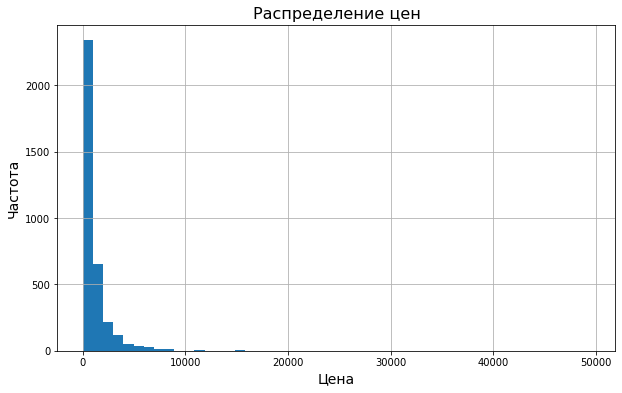

In [65]:
# Гистограмма цен
plt.figure(figsize=(10, 6))
order_totals['total_price'].hist(bins=50)
plt.title('Распределение цен', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

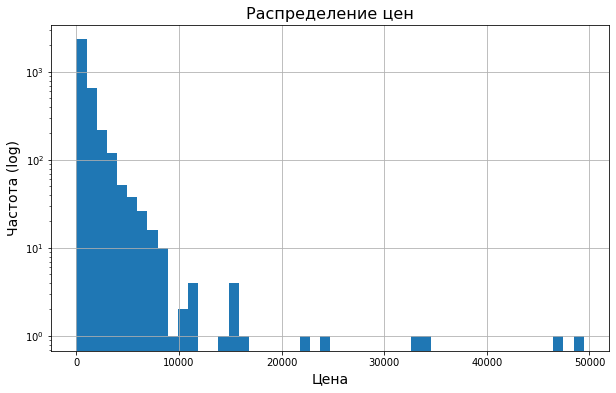

In [66]:
# Гистограмма с логарифмической шкалой
plt.figure(figsize=(10, 6))
plt.hist(order_totals['total_price'], bins=50, log=True)
plt.title('Распределение цен', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Частота (log)', fontsize=14)
plt.grid(True)
plt.show()

Мы видим, что есть выбивающиеся заказы по цене чека, но это оптовые, мы их оставляем

Посмотри по количеству заказов на покупателя

In [67]:
customer_id_orders = df_1.groupby('customer_id')['order_id'].nunique().reset_index()
customer_id_orders.sort_values(by='order_id', ascending=False).head(10)

,customer_id,order_id
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,126
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
1789,bea7a833-2074-42db-bc49-4457abd3c930,4
2109,e0535076-6270-4df2-8621-cb06264a94fa,4
788,552e17df-ba16-4e66-84fb-55a5557a6bea,3
1947,d02429ab-22e0-4ff2-9465-3082befde444,3


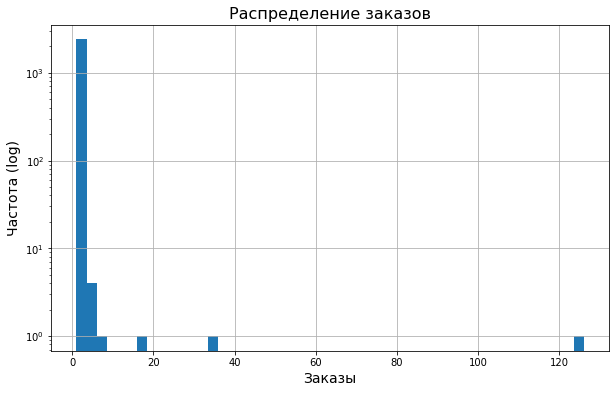

In [68]:
# Гистограмма с логарифмической шкалой
plt.figure(figsize=(10, 6))
plt.hist(customer_id_orders['order_id'], bins=50, log=True)
plt.title('Распределение заказов', fontsize=16)
plt.xlabel('Заказы', fontsize=14)
plt.ylabel('Частота (log)', fontsize=14)
plt.grid(True)
plt.show()

In [69]:
np.percentile(customer_id_orders['order_id'], [90, 95, 99])

array([2., 2., 3.])

Больше 2 заказов, совершают 1 % заказчиков. Это настоящие заказы, лояльные пользователи. Мы их оставим, но возможно выделим отдельную группу, что бы не искажать статистику по другим покупателям

# 4. Исследовательский анализ данных

Проанализируем чек покупки

In [70]:
check = df_1.groupby('order_id').agg(
    total_price=('total_price', 'sum'),
    quantity=('quantity', 'sum')
).reset_index().sort_values(by = 'total_price', ascending = False).sort_values(by='total_price', ascending=False)

In [71]:
check.head(10)

,order_id,total_price,quantity
1984,71668,"49,432",334
1057,69830,"47,385",27
720,69156,"33,680",101
910,69504,"32,718",57
567,68878,"24,370",5
501,68760,"22,056",47
1171,70080,"16,536",3
1769,71206,"15,680",10
3164,107812,"15,358",2
1893,71478,"15,300",300


In [72]:
percentiles_total_price =  np.percentile(check['total_price'], [90, 95, 99])
percentiles_quantity = np.percentile(check['quantity'], [90, 95, 99])

In [73]:
percentiles_total_price

array([2698. , 3768. , 7506.1])

Мы видим что по сумме чека, 1% заказов от 3700 рублей и выше, это является нормой для интернет магазина, заказы с чеком около 50 000 мы так же оставляем, это крупные заказчики

## Общая характеристика данных:

In [74]:
df_1.sort_values(by=['order_id','quantity'], ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category,total_price
7384,2019-12-26 22:00:00,65ed0726-5565-4c0e-905c-f9e9bd9f7642,112789,сушилка для белья потолочно-настенная gimi lift 140,2,"1,349",12,52,3,2019,cад,"2,698"
7383,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,112779,ранункулус клуни ханои 45 см нидерланды 10 штук в упаковке,1,172,1,2,5,2020,cад,172
7382,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,112767,рассада томата помидор эфемер № 121 сорт детерминантный раннеспелый красный,1,38,12,52,0,2019,cад,38
7381,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,112732,петуния surprise marine синяя объем 05 л,1,90,11,47,1,2019,cад,90
7380,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,112722,пеларгония плющелистная розовая в подвесном кашпо d-23 см,1,450,12,50,2,2019,cад,450
7379,2019-11-18 00:00:00,14f49722-d88f-4167-9cd9-6eefc2ad0636,112721,коврик ворсовый для ванной комнаты orthospa river rocks grey из микрофибры и пвх прямоугольный 50х85 см серо-белый apache 4666,1,"1,874",11,47,0,2019,ванная,"1,874"
7378,2019-11-11 00:00:00,b39d051c-5f04-43b8-a064-75930b6b9199,112699,"плечики пластмассовые размер 48 - 54 ""мп"" 1205160",1,22,11,46,0,2019,хранение,22
7377,2020-01-16 10:00:00,e303797d-9f33-49a4-b806-4d3dd3ed53d8,112691,сушилка для белья потолочная лиана 16 м 1703005,1,539,1,3,3,2020,cад,539
7376,2019-12-02 16:00:00,c42ba183-9dfe-4b9b-a572-3624973eab54,112689,незабудка смесь 01 г 4650091480340,1,10,12,49,0,2019,cад,10
7375,2019-11-28 07:00:00,a5b92679-3a56-4ff6-afb9-8a847b8fc8b0,112677,рассада зелени для кухни мята эппл минт диам. 9 см,1,120,11,48,3,2019,cад,120


In [75]:
order_id = df_1.groupby('order_id').agg(
    total_price=('total_price', 'sum'),
    quantity=('quantity', 'sum')
).reset_index().sort_values(by = 'total_price', ascending = False)

In [76]:
order_id.head(10)

,order_id,total_price,quantity
1984,71668,"49,432",334
1057,69830,"47,385",27
720,69156,"33,680",101
910,69504,"32,718",57
567,68878,"24,370",5
501,68760,"22,056",47
1171,70080,"16,536",3
1769,71206,"15,680",10
3164,107812,"15,358",2
1893,71478,"15,300",300


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>


Я неправильно поняла как именно дублируются товара, думала что на каждую единицу товара создается строчка и сложила. Ошибка в price - это ошибка в расчетах


</div>


In [77]:
order_id.describe()

,order_id,total_price,quantity
count,"3,491","3,491","3,491"
mean,"73,602","1,121",4
std,"23,418","2,087",13
min,"12,624",9,1
25%,"69,440",194,1
50%,"71,159",577,1
75%,"72,906","1,248",2
max,"112,789","49,432",334


In [78]:
np.percentile(order_id['quantity'], [90, 95, 99])

array([ 8. , 15. , 45.2])

5 % заказов с количеством товаров выше 15, и 1% выше 45

In [79]:
percentiles= np.percentile(order_id['total_price'], [90, 95, 99])
percentiles

array([2698. , 3768. , 7506.1])

5 % заказов на сумму выше 3768, и 1% выше 7506.1

Есть сымсыл выделить данные заказы в отдельные группы

Разделим заказы на мелкие, средние, крупные

In [80]:
p90, p95, p99 = percentiles

In [81]:
# Сгруппировать данные по 'order_id' и вычислить общую стоимость для каждого заказа
df_grouped = df_1.groupby('order_id').agg(
    total_price=('total_price', 'sum')  # Считаем общую стоимость заказа
).reset_index()


# Добавляем категории на основе условий
def categorize_order(price):
    if price <= p90:
        return '90%'
    elif p90 < price <= p95:
        return 'Средние'
    elif p95 < price <= p99:
        return 'Крупные'
    elif price > p99:
        return 'Самые крупные'
    
# Применяем функцию для создания категории
df_grouped['order_size'] = df_grouped['total_price'].apply(categorize_order)

# Объединяем обратно с оригинальным DataFrame
df_1 = df_1.merge(df_grouped[['order_id', 'order_size']], on='order_id', how='left')
df_1 = df_1.drop(columns=['order_size_x', 'order_size_y'], errors='ignore')

In [82]:
df_1.head(10)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category,total_price,order_size
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225,6,22,6,2019,cад,225,90%
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150,6,22,6,2019,cад,150,90%
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,11,46,4,2018,cад,315,90%
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,11,46,4,2018,cад,207,90%
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,11,46,4,2018,cад,162,90%
5,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни базилик тонус кассета по 6шт,1,169,10,40,1,2018,cад,169,90%
6,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объем 05 л,1,89,10,40,1,2018,cад,89,90%
7,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам. 9 см,1,101,10,40,1,2018,cад,101,90%
8,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-красная простая,1,150,10,40,1,2018,cад,150,90%
9,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиреневый полумахровый,1,150,10,40,1,2018,cад,150,90%


Подготовим датафрейм для анализа ( Заказ - с итоговым чеком)

In [83]:
grouped_df = df_1.groupby('order_id').agg({
    'product': 'count',              # Количество строк в колонке "product"
    'customer_id': 'first',          # Берем первое значение
    'quantity': 'sum',               # Суммируем количество товаров
    'price': 'sum',                  # Суммируем цены
    'total_price': 'sum',            # Суммируем общую стоимость
    'date': 'first',                 # Берем первое значение даты
    'month': 'first',                # Берем первое значение месяца
    'week': 'first',                 # Берем первое значение недели
    'year': 'first',
    'day_of_week': 'first',          # Берем первое значение дня недели
    'category': 'first',             # Берем первую категорию             
    'order_size': 'first'
}).reset_index()

In [84]:
# Удалим столбец price и category там при группировке получится неправильное значение
# quantity - единиц товаро в чеке, тоже уберем что бы не запутаться
grouped_df = grouped_df.drop(columns=['price'])
grouped_df = grouped_df.drop(columns=['category'])
grouped_df = grouped_df.drop(columns=['quantity'])

In [85]:
grouped_df.head(10)

,order_id,product,customer_id,total_price,date,month,week,year,day_of_week,order_size
0,12624,2,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,375,2019-06-02 20:00:00,6,22,2019,6,90%
1,13547,3,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,684,2018-11-16 16:00:00,11,46,2018,4,90%
2,14480,3,f08d9018-438e-4e96-b519-f74c0302a433,359,2018-10-02 11:00:00,10,40,2018,1,90%
3,14481,4,49b9c587-c19e-4481-bace-967aeac357fa,600,2018-10-02 17:00:00,10,40,2018,1,90%
4,14482,2,43993fd2-20c9-44f7-8634-cf0aee26df4f,376,2018-10-07 12:00:00,10,40,2018,6,90%
5,14485,3,f2c89d9e-9cec-45c8-85ed-883cb1170e47,676,2018-10-10 21:00:00,10,41,2018,2,90%
6,14486,9,953ff76b-4177-491f-95a1-4f7256fd76ac,"1,880",2018-10-11 14:00:00,10,41,2018,3,90%
7,14487,4,585b1d92-f760-41f1-80bd-824fb827f34a,514,2018-10-17 16:00:00,10,42,2018,2,90%
8,14490,5,6f1a9a1a-0322-46e4-a692-0f253fdcd1ce,750,2018-10-19 22:00:00,10,42,2018,4,90%
9,14494,4,49b9c587-c19e-4481-bace-967aeac357fa,752,2018-10-23 13:00:00,10,43,2018,1,90%


In [86]:
grouped_df['date'].min()

Timestamp('2018-10-01 00:00:00')

In [87]:
grouped_df['date'].max()

Timestamp('2020-01-31 15:00:00')

In [88]:
total_customers = grouped_df['customer_id'].nunique()
print(f'Общее количество клиентов: {total_customers}')

Общее количество клиентов: 2412


In [89]:
grouped_df_big = grouped_df[grouped_df['order_size'] == 'Самые крупные']
grouped_df_big.describe()

,order_id,product,total_price,month,week,year,day_of_week
count,35,35,35,35,35,35,35
mean,"70,967",2,"14,509",7,27,"2,019",2
std,"13,386",4,"10,718",4,16,1,2
min,"14,735",1,"7,597",1,1,"2,018",0
25%,"68,893",1,"8,348",4,15,"2,018",1
50%,"70,423",1,"9,915",7,24,"2,019",2
75%,"71,633",1,"15,329",10,44,"2,019",4
max,"109,758",21,"49,432",12,51,"2,020",6


**Вывод по категории "Самые крупные"**
1. **Количество заказов**: 35 — категория редкая и эксклюзивная.  
2. **Средняя стоимость заказа**: **14,509**.  
3. **Среднее количество продуктов на заказ**: 2.  
4. **Пиковый период активности**: летние месяцы.  


Создадим датафрейм для 99% остальных заказов

In [90]:
grouped_df_less = grouped_df[grouped_df['order_size'] != 'Самые крупные']

In [91]:
grouped_df_less.describe()

,order_id,product,total_price,month,week,year,day_of_week
count,"3,456","3,456","3,456","3,456","3,456","3,456","3,456"
mean,"73,629",2,986,7,28,"2,019",3
std,"23,497",3,"1,198",4,17,1,2
min,"12,624",1,9,1,1,"2,018",0
25%,"69,447",1,188,3,11,"2,019",1
50%,"71,162",1,569,7,30,"2,019",3
75%,"72,916",1,"1,199",11,45,"2,019",4
max,"112,789",51,"7,496",12,52,"2,020",6


1. **Количество заказов**: **3,456** — основная масса данных.  
2. **Средняя стоимость заказа**: **986**.  
3. **Среднее количество продуктов**: **3 продукта на заказ**.  
4. **Пиковый месяц**: **7-й месяц (июль)**.  
   - Активность заказов достигает максимума летом.  

In [92]:
orders_per_customer = grouped_df.groupby('customer_id')['order_id'].nunique()
customers_per_order_count = orders_per_customer.value_counts().reset_index()
customers_per_order_count.columns = ['orders_per_customer', 'customers_count']
customers_per_order_count

,orders_per_customer,customers_count
0,1,1539
1,2,845
2,3,20
3,4,3
4,126,1
5,5,1
6,7,1
7,17,1
8,35,1


Мы видим что большая часть клиентов делают 1 заказ ( около 1500 ), 2 заказа 11% (199). Дальше идет значительное снижение

Расчитаем выручку по месяцам

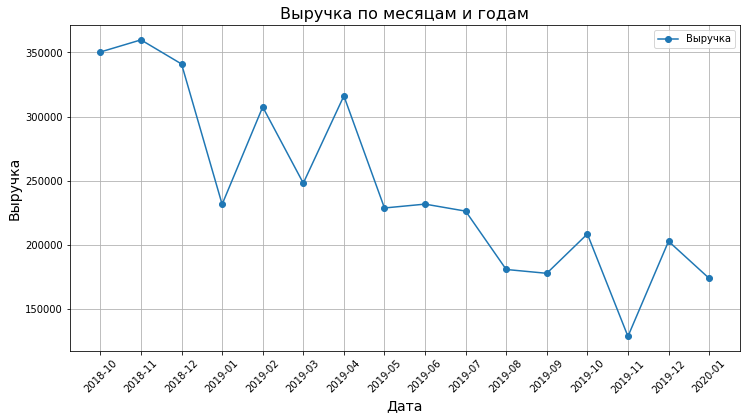

In [93]:
# Группировка данных по году и месяцу, подсчёт общей выручки
revenue_by_month = grouped_df.groupby(['year', 'month'], as_index=False)['total_price'].sum()

# Создаем новый столбец 'date' на основе 'year' и 'month'
revenue_by_month['date'] = pd.to_datetime(revenue_by_month['year'].astype(str) + '-' +
                                          revenue_by_month['month'].astype(str))

# Сортировка данных по дате
revenue_by_month = revenue_by_month.sort_values(by='date')

# Преобразование дат для отображения в формате 'ГГГГ-MM'
revenue_by_month['date_str'] = revenue_by_month['date'].dt.strftime('%Y-%m')

# Построение графика выручки по месяцам
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['date_str'], revenue_by_month['total_price'],
         marker='o', linestyle='-', color='tab:blue', label='Выручка')

# Настройка графика
plt.title('Выручка по месяцам и годам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.xticks(revenue_by_month['date_str'], rotation=45)  # Поворот меток оси X
plt.grid(True)
plt.legend()
plt.show()



In [94]:
revenue_by_month

,year,month,total_price,date,date_str
0,2018,10,"350,330",2018-10-01,2018-10
1,2018,11,"359,772",2018-11-01,2018-11
2,2018,12,"340,978",2018-12-01,2018-12
3,2019,1,"231,666",2019-01-01,2019-01
4,2019,2,"307,504",2019-02-01,2019-02
5,2019,3,"248,149",2019-03-01,2019-03
6,2019,4,"316,122",2019-04-01,2019-04
7,2019,5,"228,814",2019-05-01,2019-05
8,2019,6,"231,825",2019-06-01,2019-06
9,2019,7,"226,361",2019-07-01,2019-07


Мы видим что выручка значительно снизилась за весь период

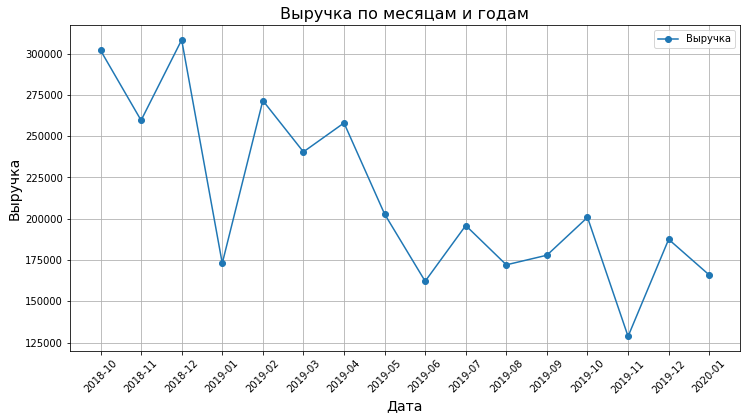

In [95]:
# Группировка данных по году и месяцу, подсчёт общей выручки
revenue_by_month = grouped_df_less.groupby(['year', 'month'], as_index=False)['total_price'].sum()

# Создаем новый столбец 'date' на основе 'year' и 'month'
revenue_by_month['date'] = pd.to_datetime(revenue_by_month['year'].astype(str) + '-' +
                                          revenue_by_month['month'].astype(str))

# Сортировка данных по дате
revenue_by_month = revenue_by_month.sort_values(by='date')

# Преобразование дат для отображения в формате 'ГГГГ-MM'
revenue_by_month['date_str'] = revenue_by_month['date'].dt.strftime('%Y-%m')

# Построение графика выручки по месяцам
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['date_str'], revenue_by_month['total_price'],
         marker='o', linestyle='-', color='tab:blue', label='Выручка')

# Настройка графика
plt.title('Выручка по месяцам и годам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.xticks(revenue_by_month['date_str'], rotation=45)  # Поворот меток оси X
plt.grid(True)
plt.legend()
plt.show()


Без самых крупных заказов картина не особо поменялась, снижения стали более резкими

Проанализируем средний чек

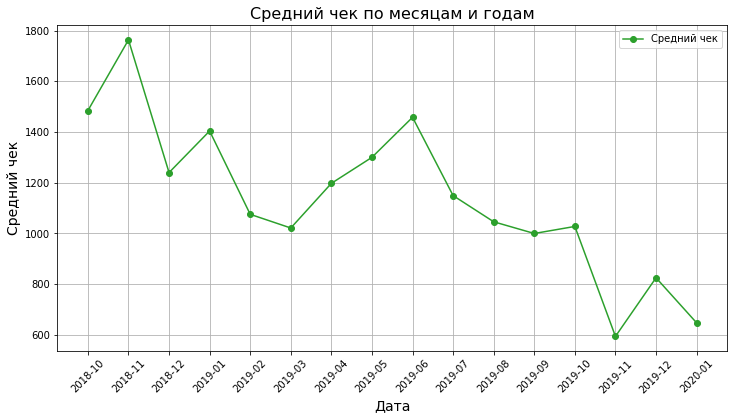

In [96]:
# Группировка данных по году и месяцу и вычисление среднего чека
avg_check_by_month = grouped_df.groupby(['year', 'month'], as_index=False)['total_price'].mean()

# Создаем новый столбец 'date' для объединения года и месяца
avg_check_by_month['date'] = pd.to_datetime(avg_check_by_month['year'].astype(str) + '-' +
                                            avg_check_by_month['month'].astype(str))

# Сортируем данные по дате
avg_check_by_month = avg_check_by_month.sort_values(by='date')

# Преобразование даты для подписей на оси X
avg_check_by_month['date_str'] = avg_check_by_month['date'].dt.strftime('%Y-%m')

# Построение линейного графика среднего чека
plt.figure(figsize=(12, 6))
plt.plot(avg_check_by_month['date_str'], avg_check_by_month['total_price'], 
         marker='o', linestyle='-', color='tab:green', label='Средний чек')

# Настройка графика
plt.title('Средний чек по месяцам и годам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.xticks(avg_check_by_month['date_str'], rotation=45)  # Поворот подписей оси X
plt.grid(True)
plt.legend()
plt.show()

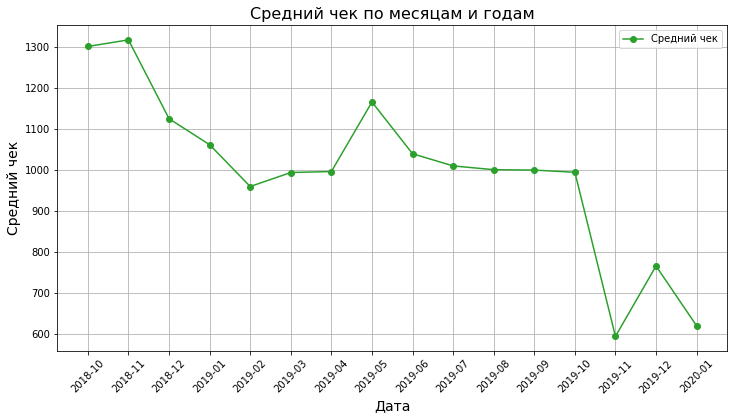

In [97]:
# Группировка данных по году и месяцу и вычисление среднего чека
avg_check_by_month = grouped_df_less.groupby(['year', 'month'], as_index=False)['total_price'].mean()

# Создаем новый столбец 'date' для объединения года и месяца
avg_check_by_month['date'] = pd.to_datetime(avg_check_by_month['year'].astype(str) + '-' +
                                            avg_check_by_month['month'].astype(str))

# Сортируем данные по дате
avg_check_by_month = avg_check_by_month.sort_values(by='date')

# Преобразование даты для подписей на оси X
avg_check_by_month['date_str'] = avg_check_by_month['date'].dt.strftime('%Y-%m')

# Построение линейного графика среднего чека
plt.figure(figsize=(12, 6))
plt.plot(avg_check_by_month['date_str'], avg_check_by_month['total_price'], 
         marker='o', linestyle='-', color='tab:green', label='Средний чек')

# Настройка графика
plt.title('Средний чек по месяцам и годам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.xticks(avg_check_by_month['date_str'], rotation=45)  # Поворот подписей оси X
plt.grid(True)
plt.legend()
plt.show()

Средний чек будем смотреть без самых крупных заказов (1%)

Средний чек упал сначадла в ноябре 18, и потом снова в октябре 19 и назад так и не вернулся

Проведем анализ товаров по категориям

In [98]:
df_1.head()

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category,total_price,order_size
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225,6,22,6,2019,cад,225,90%
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150,6,22,6,2019,cад,150,90%
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,11,46,4,2018,cад,315,90%
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,11,46,4,2018,cад,207,90%
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,11,46,4,2018,cад,162,90%


<div id="div_id15" class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; position: relative; padding: 15px; padding-left: 80px;">
<img src="https://lh3.googleusercontent.com/a/AAcHTtc31jlywy-FMYxLAouSSqNAmm5NsrBvivwRIASNt7wihI2ClYdpAbzWNqcigfcR04LfvopHwsJrJpnVr4UXDkCHtWk=s432-c-no" width="45" height="45" style="position: absolute; top: 15px; left: 15px; border-radius: 50%;">
<b> ⁉️  Критическое замечание тимлида : </b>

<s>[⬆ Ошибка №15](#1)

Нельзя считать количество заказов в разрезе категорий товаров.

В заказе могут быть товары из разных категорий.

Допустим есть заказ из дверной ручки и цветка. Этот заказ будет как в категории "мебель", так и в категории "сад". Это искажает исходную картину

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> Комментарий студента : </b>


Не использовала код, сделала ниже по другому


</div>


In [99]:
# Группировка данных по категориям товаров
category_analysis = df_1.groupby('category').agg(
    total_quantity=('quantity', 'sum'),         # Общее количество товаров
    total_revenue=('total_price', 'sum'),      # Общая выручка
    avg_price_per_item=('price', 'mean'),      # Средняя цена товара
).reset_index()

# Рассчитаем долю каждой категории в общей выручке
total_revenue_sum = category_analysis['total_revenue'].sum()
category_analysis['revenue_share'] = (category_analysis['total_revenue'] / total_revenue_sum * 100).round(2)

# Сортируем по общей выручке
category_analysis = category_analysis.sort_values(by='total_revenue', ascending=False)

In [100]:
category_analysis # total_price это количество товара на цену заказа (по строке)

,category,total_quantity,total_revenue,avg_price_per_item,revenue_share
9,хранение,2132,"1,302,527","1,427",33
0,cад,4870,"891,910",233,23
8,уборка,984,"472,138","1,090",12
1,ванная,977,"341,518",806,9
5,кухня,1291,"307,321",416,8
7,текстиль,336,"270,390",702,7
3,декор,1860,"151,582",202,4
4,инструменты,676,"134,806","1,309",3
6,мебель,61,"31,275",706,1
2,гигиена,46,"11,155",281,0


1. **Лидеры по выручке**:
   - **Хранение** занимает первое место с общей выручкой **1,302,527** и долей **33%** от общей выручки.
   - **Сад** на втором месте — **891,910** (доля **23%**).
   - **Уборка** замыкает тройку лидеров с выручкой **472,138** (доля **12%**).

2. **Средняя цена за товар**:
   - Наивысшая средняя цена — у категории **Инструменты** (**1,309**), несмотря на небольшой объем (676 единиц).
   - Категория **Хранение** имеет высокую среднюю цену **1,427**, что подтверждает ее лидерство по выручке.

3. **Категории с минимальной выручкой**:
   - **Мебель** и **Гигиена** показали наименьшую выручку: **31,275** и **11,155** соответственно. Их доля в общей выручке — **1%** и **0%**.

4. **Общее распределение**:
   - Лидеры выручки (Хранение и Сад) генерируют **56%** всей выручки.
   - Остальные категории имеют умеренную или низкую долю, что свидетельствует о менее востребованных товарах или низкой средней цене.

---

 **Рекомендации**:
1. Уделить особое внимание продвижению товаров из категорий **Хранение** и **Сад** для сохранения лидерства.  
2. Повысить активность по категориям **Мебель** и **Гигиена** — либо через акции, либо через расширение ассортимента.  
3. Исследовать спрос на товары с высокой средней стоимостью, например, **Инструменты**, чтобы увеличить их объем продаж.

Сезонность покупок по категориям

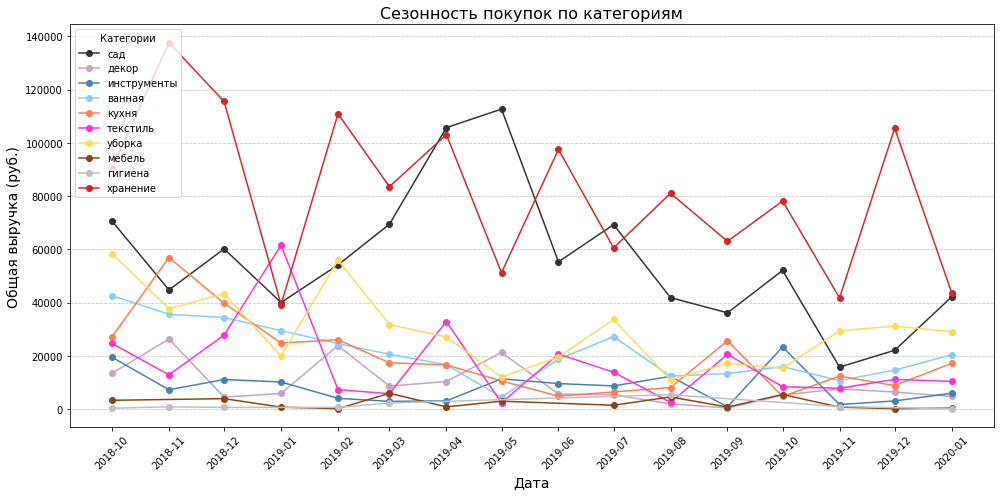

In [101]:
# Группировка данных по категории, году и месяцу, подсчет общей выручки
seasonality_analysis = df_1.groupby(['category', 'year', 'month'], as_index=False)['total_price'].sum()

# Создаем новый столбец 'date' для объединения года и месяца
seasonality_analysis['date'] = pd.to_datetime(seasonality_analysis['year'].astype(str) + '-' +
                                              seasonality_analysis['month'].astype(str))

# Сортируем данные по дате
seasonality_analysis = seasonality_analysis.sort_values(by='date')

# Полный список месяцев для оси X
all_dates = seasonality_analysis['date'].dt.strftime('%Y-%m').unique()

# Цвета для категорий
category_colors = {
    'хранение': '#d62728',     # красный
    'сад': '#32CD32',          # лаймовый зелёный
    'уборка': '#ffdb58',       # жёлтый
    'ванная': '#87CEFA',       # светло-синий
    'кухня': '#FF7F50',        # коралловый
    'текстиль': '#ff33cc',     # фуксия
    'декор': '#C8A2C8',        # сиреневый
    'инструменты': '#4682B4',  # стальной синий
    'мебель': '#8B4513',       # шоколадный
    'гигиена': '#c0c0c0'       # светло-серый
}

# Построение графика сезонности по категориям
plt.figure(figsize=(14, 7))

# Строим линии для каждой категории с фиксированным цветом
for category in seasonality_analysis['category'].unique():
    category_data = seasonality_analysis[seasonality_analysis['category'] == category]
    color = category_colors.get(category, '#333333')  # Цвет по категории, если нет — серый
    plt.plot(category_data['date'], category_data['total_price'], 
             marker='o', linestyle='-', color=color, label=category)

# Настройка графика
plt.title('Сезонность покупок по категориям', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Общая выручка (руб.)', fontsize=14)
plt.xticks(pd.to_datetime(all_dates), all_dates, rotation=45)  # Полный список месяцев
plt.legend(title='Категории', fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()


Посвмотрим без самых крупных заказов (1%)

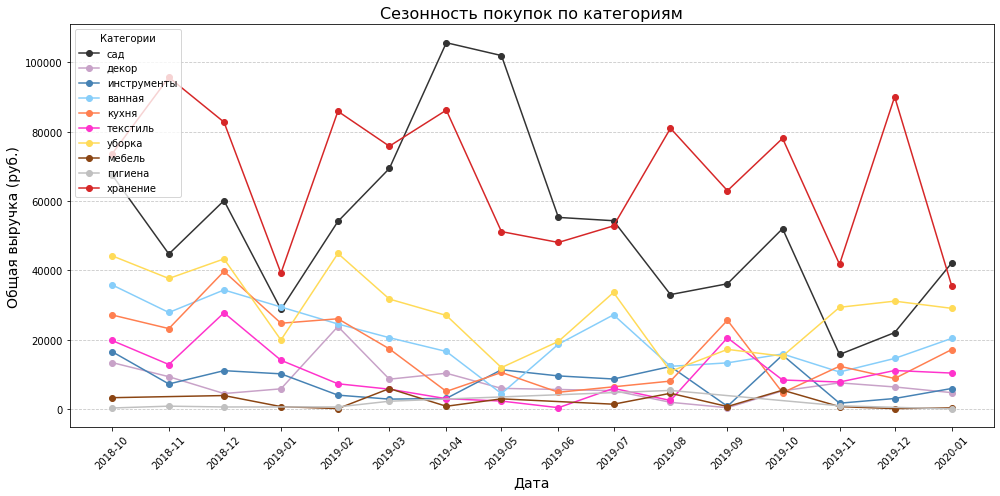

In [102]:
seasonality_analysis = df_1[df_1['order_size'] != 'Самые крупные']
seasonality_analysis = seasonality_analysis.groupby(['category', 'year', 'month'], as_index=False)['total_price'].sum()

# Создаем новый столбец 'date' для объединения года и месяца
seasonality_analysis['date'] = pd.to_datetime(seasonality_analysis['year'].astype(str) + '-' +
                                              seasonality_analysis['month'].astype(str))

# Сортируем данные по дате
seasonality_analysis = seasonality_analysis.sort_values(by='date')

# Полный список месяцев для оси X
all_dates = seasonality_analysis['date'].dt.strftime('%Y-%m').unique()

# Цвета для категорий
category_colors = {
    'хранение': '#d62728',     # красный
    'сад': '#32CD32',          # лаймовый зелёный
    'уборка': '#ffdb58',       # жёлтый
    'ванная': '#87CEFA',       # светло-синий
    'кухня': '#FF7F50',        # коралловый
    'текстиль': '#ff33cc',     # фуксия
    'декор': '#C8A2C8',        # сиреневый
    'инструменты': '#4682B4',  # стальной синий
    'мебель': '#8B4513',       # шоколадный
    'гигиена': '#c0c0c0'       # светло-серый
}

# Построение графика сезонности по категориям
plt.figure(figsize=(14, 7))

# Строим линии для каждой категории с фиксированным цветом
for category in seasonality_analysis['category'].unique():
    category_data = seasonality_analysis[seasonality_analysis['category'] == category]
    color = category_colors.get(category, '#333333')  # Цвет по категории, если нет — серый
    plt.plot(category_data['date'], category_data['total_price'], 
             marker='o', linestyle='-', color=color, label=category)

# Настройка графика
plt.title('Сезонность покупок по категориям', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Общая выручка (руб.)', fontsize=14)
plt.xticks(pd.to_datetime(all_dates), all_dates, rotation=45)  # Полный список месяцев
plt.legend(title='Категории', fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()


1. **Хранение** (красный):
   - Лидер по выручке среди всех категорий.
   - Явно выраженные пики продаж приходятся на **декабрь 2018**, **март-апрель 2019** и **декабрь 2019**, что связано с подготовкой к праздникам и сезонной организацией пространства.

2. **Сад** (лаймовый зелёный):
   - Категория демонстрирует высокие значения выручки в **апреле 2019** и **сентябре 2019**, что связано с весенне-летним садовым сезоном и подготовкой к осени.

3. **Кухня** (коралловый):
   - Стабильные показатели на протяжении года.
   - Всплески заметны в **декабре 2018** и **сентябре-октябре 2019**, что может указывать на сезонный спрос перед праздниками и осенние заготовки.

4. **Уборка** (жёлтый):
   - Умеренные пики приходятся на **декабрь 2018** и **июнь 2019**, отражая сезонную активность по генеральной уборке и поддержанию порядка.

5. **Гигиена**, **ванная**, **текстиль**, **декор**:
   - Категории показывают стабильные, но низкие значения продаж.
   - **Текстиль** и **декор** немного активизируются в начале осени и в декабре.

6. **Инструменты** и **мебель**:
   - Продажи остаются минимальными в течение всего периода без значительных колебаний.

Общий вывод:
Категории **"хранение"**, **"сад"** и **"кухня"** демонстрируют ярко выраженную сезонность с пиками в весенние и предновогодние месяцы. **"Уборка"** также имеет заметный рост продаж в ключевые периоды. Остальные категории показывают более стабильный, но менее выраженный спрос.


## Основные вопросы исследования

### Выделение основных показателей интернет-магазина

Динамика выручки: Выручка демонстрирует значительное снижение за весь рассматриваемый период.

Средний чек и его динамика: Средний чек заметно упал дважды: в ноябре 2020 года и ноябре 2011 года. После этих падений его уровень не восстановился.

Помесячная динамика средней выручки с покупателя ( смотрим без самых крупных заказов)

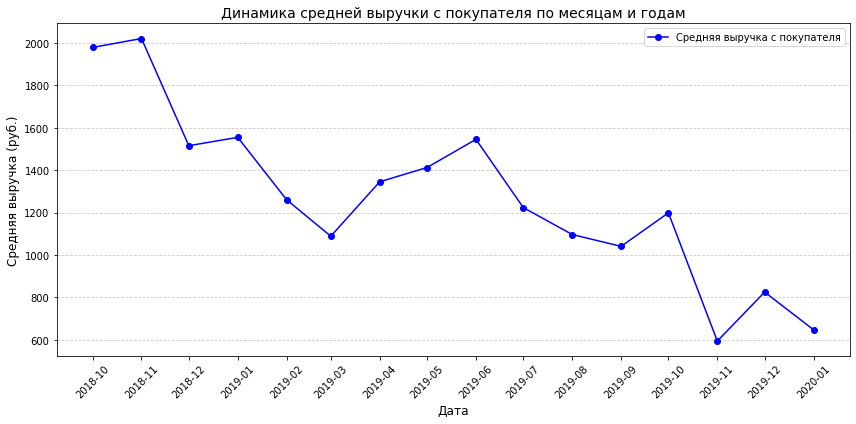

In [103]:
# Группировка по месяцу и покупателю, расчёт выручки
monthly_customer_revenue = grouped_df.groupby(['year', 'month', 'customer_id'])['total_price'].sum().reset_index()

# Группировка по году и месяцу, расчёт средней выручки с покупателя
monthly_avg_revenue = monthly_customer_revenue.groupby(['year', 'month'])['total_price'].mean().reset_index()

# Создаём новый столбец 'date' для объединения года и месяца
monthly_avg_revenue['date'] = pd.to_datetime(monthly_avg_revenue['year'].astype(str) + '-' +
                                             monthly_avg_revenue['month'].astype(str))

# Переименовываем столбцы
monthly_avg_revenue = monthly_avg_revenue.rename(columns={'total_price': 'avg_revenue_per_customer'})

# Сортируем данные по дате
monthly_avg_revenue = monthly_avg_revenue.sort_values(by='date')

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_avg_revenue['date'],
    monthly_avg_revenue['avg_revenue_per_customer'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Средняя выручка с покупателя'
)

# Настройка графика
plt.title('Динамика средней выручки с покупателя по месяцам и годам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя выручка (руб.)', fontsize=12)
plt.xticks(monthly_avg_revenue['date'], monthly_avg_revenue['date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Отображение графика
plt.show()


Динамика средней выручки с покупателя по месяцам и годам

1. **Общее снижение**:
   - Средняя выручка с покупателя снизилась с **2000 руб.** в октябре-ноябре 2018 года до **600-700 руб.** в конце 2019 года.
   - Наблюдается устойчивый нисходящий тренд на протяжении всего периода.

2. **Резкие изменения**:
   - **Ноябрь 2018**: пик средней выручки (~2000 руб.).
   - **Декабрь 2018**: резкий спад до **1500 руб.**.
   - **Апрель-май 2019**: временное восстановление с ростом до **1600 руб.**, после чего снова начался спад.

3. **Минимумы**:
   - Самое низкое значение зафиксировано в **ноябре 2019** (~600 руб.)


Посвмотрим без самых крупных заказов (1%)

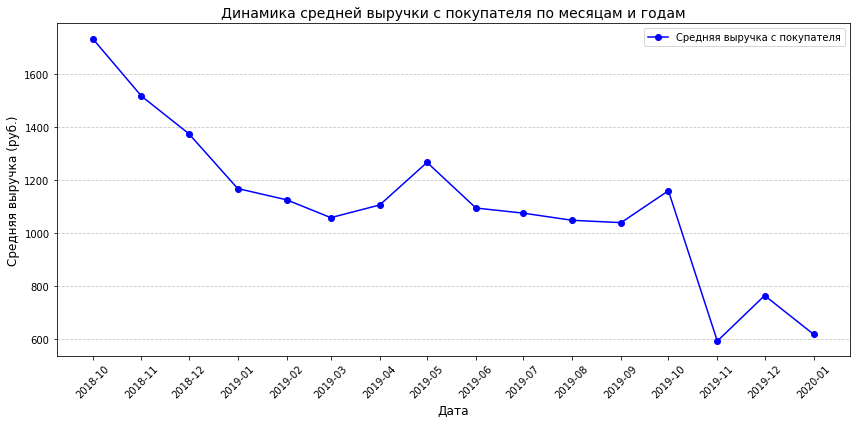

In [104]:
# Группировка по месяцу и покупателю, расчёт выручки
monthly_customer_revenue = grouped_df_less.groupby(['year', 'month', 'customer_id'])['total_price'].sum().reset_index()

# Группировка по году и месяцу, расчёт средней выручки с покупателя
monthly_avg_revenue = monthly_customer_revenue.groupby(['year', 'month'])['total_price'].mean().reset_index()

# Создаём новый столбец 'date' для объединения года и месяца
monthly_avg_revenue['date'] = pd.to_datetime(monthly_avg_revenue['year'].astype(str) + '-' +
                                             monthly_avg_revenue['month'].astype(str))

# Переименовываем столбцы
monthly_avg_revenue = monthly_avg_revenue.rename(columns={'total_price': 'avg_revenue_per_customer'})

# Сортируем данные по дате
monthly_avg_revenue = monthly_avg_revenue.sort_values(by='date')

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_avg_revenue['date'],
    monthly_avg_revenue['avg_revenue_per_customer'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Средняя выручка с покупателя'
)

# Настройка графика
plt.title('Динамика средней выручки с покупателя по месяцам и годам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя выручка (руб.)', fontsize=12)
plt.xticks(monthly_avg_revenue['date'], monthly_avg_revenue['date'].dt.strftime('%Y-%m'), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Отображение графика
plt.show()


Картина примерно таже, без резких скачков

1. **Общее снижение**:
   - Средняя выручка с покупателя снизилась с **1700 руб.** в октябре 2018 до **600 руб.** в ноябре 2019.

2. **Кратковременные всплески**:
   - **Май 2019** и **октябрь 2019** показали небольшое восстановление, но тренд остаётся нисходящим.

3. **Минимумы**:
   - Минимальные значения зафиксированы в **ноябре 2019** (~600 руб.) и **январе 2020** (~650 руб.).


Топ клиентов по выручке за весь период

In [105]:
# Группировка по покупателям и расчёт общей выручки
top_customers = df_1.groupby('customer_id')['total_price'].sum().reset_index()

# Переименуем столбцы для удобства
top_customers.columns = ['customer_id', 'total_revenue']

# Сортируем по общей выручке
top_customers = top_customers.sort_values(by='total_revenue', ascending=False)

# Выводим топ-10 клиентов
top_10_customers = top_customers.head(10)
top_10_customers

,customer_id,total_revenue
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,"159,508"
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,"57,278"
822,58a4c3cc-504f-43ea-a74a-bae19e665552,"53,232"
195,146cd9bf-a95c-4afb-915b-5f6684b17444,"49,432"
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,"41,900"
1336,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,"33,680"
972,6987e6d6-a63a-4ce2-a2d0-f424092d235e,"32,718"
263,1b2764ad-9151-4051-a46a-9b01b62e6335,"24,370"
1481,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,"22,056"
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,"21,361"


### Сегментация покупателей на основе истории их покупок

Для сегментации клиентов используем RFM анализ



Методология разделения клиентов в RFM-анализе

Recency (давность)
- Определяется как количество дней с момента последней покупки клиента.
  - **3**: клиенты с недавними покупками (наиболее "свежие" клиенты).
  - **2**: клиенты, совершавшие покупки в среднем времени назад.
  - **1**: клиенты, давно неактивные.
- Этот подход позволяет выделить клиентов по уровню их актуальности для бизнеса.

Frequency (частота)
- Подсчитано количество уникальных заказов клиента.
  - **3**: частые покупатели.
  - **2**: умеренные покупатели.
  - **1**: редкие покупатели.
- Частота помогает понять, насколько регулярно клиент взаимодействует с продуктами.

Monetary (траты)
- Сумма денег, которую клиент потратил на покупки.
  - **3**: клиенты с высокими затратами.
  - **2**: средние затраты.
  - **1**: низкие затраты.
- Это позволяет выявить наиболее ценных с точки зрения дохода клиентов.

Для разделения внутри группы используем квантильное разбиение?
- Квантильное разбиение делит клиентов на равные группы по численности, что позволяет адекватно анализировать данные с разными распределениями (например, долгие периоды давности или редкие большие покупки).
- Этот метод универсален и хорошо подходит для ранжирования, если нет заранее установленных порогов.


In [106]:
# Определение даты отсечки
cutoff_date = df_1['date'].max() + pd.Timedelta(days=1)

# Расчет RFM метрик
rfm_data = df_1.groupby('customer_id').agg({
    'date': lambda x: (cutoff_date - x.max()).days,  # Давность последней покупки (Recency)
    'order_id': 'nunique',  # Количество уникальных заказов (Frequency)
    'total_price': 'sum'  # Общая сумма покупок (Monetary)
}).rename(columns={
    'date': 'Recency',
    'order_id': 'Frequency',
    'total_price': 'Monetary'
})

# Установка порогов для сегментации
rfm_data['Recency'] = pd.qcut(rfm_data['Recency'], q=3, labels=[3, 2, 1]).astype(int)
rfm_data['Frequency'] = pd.qcut(rfm_data['Frequency'].rank(method="first"), q=3, labels=[1, 2, 3]).astype(int)
rfm_data['Monetary'] = pd.qcut(rfm_data['Monetary'].rank(method="first"), q=3, labels=[1, 2, 3]).astype(int)

# Формирование RFM таблицы с сегментацией
rfm_result = rfm_data[['Recency', 'Frequency', 'Monetary']]


In [107]:
rfm_result.head(10)

,Recency,Frequency,Monetary
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,2,1,2
001cee7f-0b29-4716-b202-0042213ab038,1,1,1
00299f34-5385-4d13-9aea-c80b81658e1b,2,1,2
002d4d3a-4a59-406b-86ec-c3314357e498,1,1,3
003bbd39-0000-41ff-b7f9-2ddaec152037,2,1,3
004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1,3
005ba170-45e8-42de-93f7-192481ae2659,3,2,3
00bd74b1-2792-47db-a2f1-680a09ac5026,1,1,2
00c0f92a-121a-4883-a78d-2c7b5fe187de,3,2,1


In [108]:
# Рассчитаем RFM-счёт
rfm_data['RFM_Score'] = rfm_data[['Recency', 'Frequency', 'Monetary']].sum(axis=1)

# Определим сегменты
def assign_segment(score):
    if score >= 7:
        return 'Top'
    elif 4 <= score < 7:
        return 'Medium'
    else:
        return 'Low'

rfm_data['Segment'] = rfm_data['RFM_Score'].apply(assign_segment)


Теперь по этим данным разделим клиентов на три сегмента:

1. Лучшие клиенты (Top)
**Описание:**  
Недавно совершали покупки, делают это часто и тратят много денег.

**Критерии:**  
- Высокий RFM-счёт (например, 9–7).  
- Сегменты, такие как: `333`, `332`, `323`, и другие с доминирующими высокими значениями.

**Примерный состав:**  
Постоянные покупатели, лояльные клиенты.

---

 2. Средние клиенты (Medium)
**Описание:**  
Покупают реже или тратят меньше денег, но остаются активными.

**Критерии:**  
- Средний RFM-счёт (например, 6–4).  
- Сегменты, такие как: `222`, `221`, `223`, и другие со средними значениями.

**Примерный состав:**  
Клиенты, которые могут стать лучшими при правильном взаимодействии.

---

3. Рисковые клиенты (Low)
**Описание:**  
Давно не совершали покупок, покупают редко или тратят мало.

**Критерии:**  
- Низкий RFM-счёт (например, 3–1).  
- Сегменты, такие как: `111`, `112`, `121`, и другие с доминирующими низкими значениями.

**Примерный состав:**  
Клиенты, которые могут быть потеряны.
    

In [109]:
rfm_data.head(10)

,Recency,Frequency,Monetary,RFM_Score,Segment
customer_id,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,2,1,2,5,Medium
001cee7f-0b29-4716-b202-0042213ab038,1,1,1,3,Low
00299f34-5385-4d13-9aea-c80b81658e1b,2,1,2,5,Medium
002d4d3a-4a59-406b-86ec-c3314357e498,1,1,3,5,Medium
003bbd39-0000-41ff-b7f9-2ddaec152037,2,1,3,6,Medium
004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1,3,5,Medium
005ba170-45e8-42de-93f7-192481ae2659,3,2,3,8,Top
00bd74b1-2792-47db-a2f1-680a09ac5026,1,1,2,4,Medium
00c0f92a-121a-4883-a78d-2c7b5fe187de,3,2,1,6,Medium


Теперь клиенты разделены на три сегмента:

Top: лучшие клиенты для удержания и дальнейшей работы.\
Medium: перспективные клиенты, которых нужно поощрять.\
Low: клиенты, которые могут уйти, их нужно возвращать через скидки или акции.

Анализ данных по сегментам

In [110]:
# Подсчет количества клиентов в каждом сегменте
segment_counts = rfm_data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
segment_counts

,Segment,Count
0,Medium,1381
1,Top,893
2,Low,138


In [111]:
# Объединение df_1 и rfm_data по 'customer_id'
df_1 = df_1.merge(rfm_data[['Segment']], on='customer_id', how='left')
df_1.head(5)

,date,customer_id,order_id,product,quantity,price,month,week,day_of_week,year,category,total_price,order_size,Segment
0,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 50-100 см,1,225,6,22,6,2019,cад,225,90%,Medium
1,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,осина обыкновенная высота 25-50 см,1,150,6,22,6,2019,cад,150,90%,Medium
2,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,11,46,4,2018,cад,315,90%,Medium
3,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,11,46,4,2018,cад,207,90%,Medium
4,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,11,46,4,2018,cад,162,90%,Medium


In [112]:
grouped_rfm_data = df_1.groupby('order_id').agg({
    'product': 'count',              # Количество строк в колонке "product"
    'customer_id': 'first',          # Берем первое значение
    'quantity': 'sum',               # Суммируем количество товаров
    'price': 'sum',                  # Суммируем цены
    'total_price': 'sum',            # Суммируем общую стоимость
    'date': 'first',                 # Берем первое значение даты
    'month': 'first',                # Берем первое значение месяца
    'week': 'first',                 # Берем первое значение недели
    'year': 'first',
    'day_of_week': 'first',          # Берем первое значение дня недели
    'category': 'first',             # Берем первую категорию             
    'order_size': 'first',
    'Segment' : 'first'
    
}).reset_index()

grouped_rfm_data

grouped_rfm_data = grouped_rfm_data.drop(columns=['quantity', 'price'])

In [113]:
grouped_rfm_data.head(10)

,order_id,product,customer_id,total_price,date,month,week,year,day_of_week,category,order_size,Segment
0,12624,2,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,375,2019-06-02 20:00:00,6,22,2019,6,cад,90%,Medium
1,13547,3,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,684,2018-11-16 16:00:00,11,46,2018,4,cад,90%,Medium
2,14480,3,f08d9018-438e-4e96-b519-f74c0302a433,359,2018-10-02 11:00:00,10,40,2018,1,cад,90%,Medium
3,14481,4,49b9c587-c19e-4481-bace-967aeac357fa,600,2018-10-02 17:00:00,10,40,2018,1,cад,90%,Medium
4,14482,2,43993fd2-20c9-44f7-8634-cf0aee26df4f,376,2018-10-07 12:00:00,10,40,2018,6,cад,90%,Low
5,14485,3,f2c89d9e-9cec-45c8-85ed-883cb1170e47,676,2018-10-10 21:00:00,10,41,2018,2,cад,90%,Medium
6,14486,9,953ff76b-4177-491f-95a1-4f7256fd76ac,"1,880",2018-10-11 14:00:00,10,41,2018,3,cад,90%,Medium
7,14487,4,585b1d92-f760-41f1-80bd-824fb827f34a,514,2018-10-17 16:00:00,10,42,2018,2,cад,90%,Low
8,14490,5,6f1a9a1a-0322-46e4-a692-0f253fdcd1ce,750,2018-10-19 22:00:00,10,42,2018,4,cад,90%,Medium
9,14494,4,49b9c587-c19e-4481-bace-967aeac357fa,752,2018-10-23 13:00:00,10,43,2018,1,cад,90%,Medium


Средний чек по сегментам 

In [114]:
# Группировка по сегменту и расчет среднего чека
average_check_by_segment = grouped_rfm_data.groupby('Segment')['total_price'].mean().reset_index()

# Переименование столбца для читаемости
average_check_by_segment.rename(columns={'total_price': 'average_check'}, inplace=True)

In [115]:
average_check_by_segment

,Segment,average_check
0,Low,274
1,Medium,"1,191"
2,Top,"1,129"


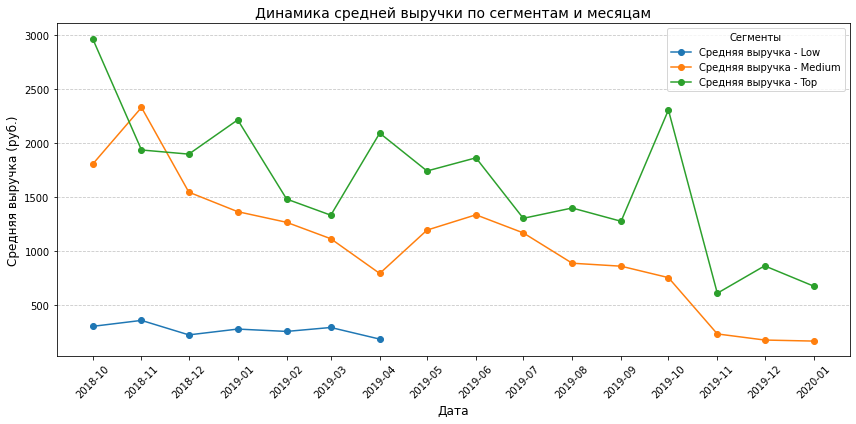

In [116]:
# Группировка по сегментам, месяцу и клиенту, расчёт общей выручки
monthly_segment_revenue = grouped_rfm_data.groupby(['year', 'month', 'Segment', 'customer_id'])['total_price'].sum().reset_index()

# Группировка по году, месяцу и сегменту, расчёт средней выручки на клиента
monthly_avg_revenue_by_segment = monthly_segment_revenue.groupby(['year', 'month', 'Segment'])['total_price'].mean().reset_index()

# Создаём новый столбец 'date' для объединения года и месяца
monthly_avg_revenue_by_segment['date'] = pd.to_datetime(monthly_avg_revenue_by_segment['year'].astype(str) + '-' +
                                                        monthly_avg_revenue_by_segment['month'].astype(str))

# Переименовываем столбцы
monthly_avg_revenue_by_segment = monthly_avg_revenue_by_segment.rename(columns={'total_price': 'avg_revenue_per_customer'})

# Сортируем данные по дате
monthly_avg_revenue_by_segment = monthly_avg_revenue_by_segment.sort_values(by='date')

# Визуализация средней выручки на клиента по сегментам
plt.figure(figsize=(12, 6))

# Построение графиков для каждого сегмента
for segment in monthly_avg_revenue_by_segment['Segment'].unique():
    segment_data = monthly_avg_revenue_by_segment[monthly_avg_revenue_by_segment['Segment'] == segment]
    plt.plot(
        segment_data['date'],
        segment_data['avg_revenue_per_customer'],
        marker='o',
        linestyle='-',
        label=f'Средняя выручка - {segment}'
    )

# Настройка оси X
plt.xticks(
    monthly_avg_revenue_by_segment['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(),
    monthly_avg_revenue_by_segment['date'].dt.strftime('%Y-%m').drop_duplicates(),
    rotation=45
)

# Настройка графика
plt.title('Динамика средней выручки по сегментам и месяцам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя выручка (руб.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Сегменты')
plt.tight_layout()

# Отображение графика
plt.show()



**Вывод:**
На графике показана динамика средней выручки по сегментам клиентов за период с октября 2018 по январь 2020. 

1. **Top сегмент**: 
   - В начале периода средняя выручка высокая (около 3000 руб.) и сохраняет умеренные колебания до осени 2019.
   - В ноябре 2019 происходит резкое падение до минимальных значений.

2. **Medium сегмент**:
   - Выручка постепенно снижается на протяжении всего периода, начиная с ~2200 руб. и заканчивая менее 200 руб.

3. **Low сегмент**:
   - Средняя выручка стабильно низкая (~200-400 руб.) на протяжении всего периода..


Анализ по сегментам и категориям

In [117]:
df_1.groupby('Segment')['date'].max()

Segment
Low      2019-04-03 12:00:00
Medium   2020-01-29 11:00:00
Top      2020-01-31 15:00:00
Name: date, dtype: datetime64[ns]

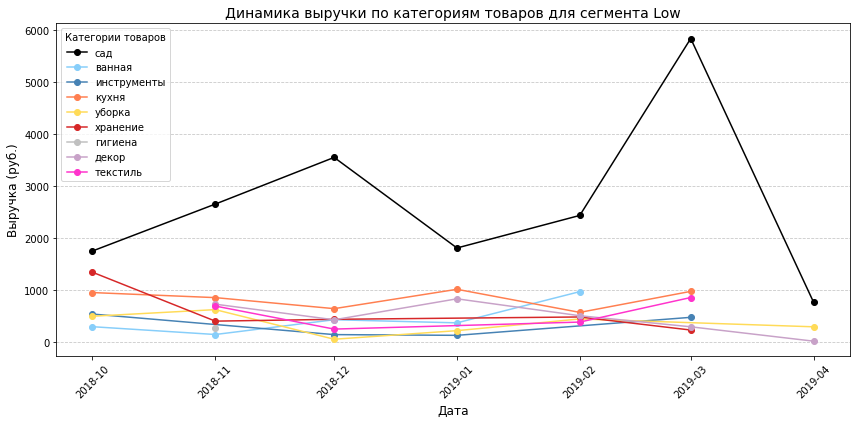

In [118]:
# Шаг 1: Группировка по году, месяцу и категории, расчёт общей выручки
monthly_category_revenue = df_1[df_1['Segment'] == 'Low'].groupby(['year', 'month', 'category'])['total_price'].sum().reset_index()

# Шаг 2: Создаём новый столбец 'date' для объединения года и месяца
monthly_category_revenue['date'] = pd.to_datetime(monthly_category_revenue['year'].astype(str) + '-' +
                                                  monthly_category_revenue['month'].astype(str))
# Используем предоставленные цвета для категорий
category_colors = {
    'хранение': '#d62728',
    'сад': '#32CD32',
    'уборка': '#ffdb58',
    'ванная': '#87CEFA',
    'кухня': '#FF7F50',
    'текстиль': '#ff33cc',
    'декор': '#C8A2C8',
    'инструменты': '#4682B4',
    'мебель': '#8B4513',
    'гигиена': '#c0c0c0'
}

# Визуализация с обновлёнными цветами категорий
plt.figure(figsize=(12, 6))

# Построение графиков для каждой категории с цветами
for category in monthly_category_revenue['category'].unique():
    category_data = monthly_category_revenue[monthly_category_revenue['category'] == category]
    plt.plot(
        category_data['date'],
        category_data['total_price'],
        marker='o',
        linestyle='-',
        label=category,
        color=category_colors.get(category, '#000000')  # Используем чёрный цвет по умолчанию для неизвестных категорий
    )

# Настройка оси X с датами
plt.xticks(
    monthly_category_revenue['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(),
    monthly_category_revenue['date'].dt.strftime('%Y-%m').drop_duplicates(),
    rotation=45
)

# Настройка графика
plt.title('Динамика выручки по категориям товаров для сегмента Low', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Категории товаров')
plt.tight_layout()

# Отображение графика
plt.show()



**Вывод:**
На графике показана динамика выручки по категориям товаров для сегмента **Low** за период с октября 2018 по апрель 2019.

1. **Категория "сад"**:
   - Имеет наибольшие колебания. Пик выручки наблюдается в марте 2019, затем резкое падение в апреле.

2. **Остальные категории**:
   - Выручка остается низкой и относительно стабильной на протяжении всего периода.
   - **Кухня** и **уборка** показывают небольшие росты в феврале-марте 2019.
   - Категории **гигиена**, **декор**, **инструменты** и **ванная** практически не изменяются и имеют минимальные значения выручки.

Таким образом, категория **"сад"** является основным драйвером выручки в сегменте **Low**, что может быть связано с сезонными факторами. Остальные категории приносят незначительный вклад в выручку и требуют дополнительных мер для их роста.


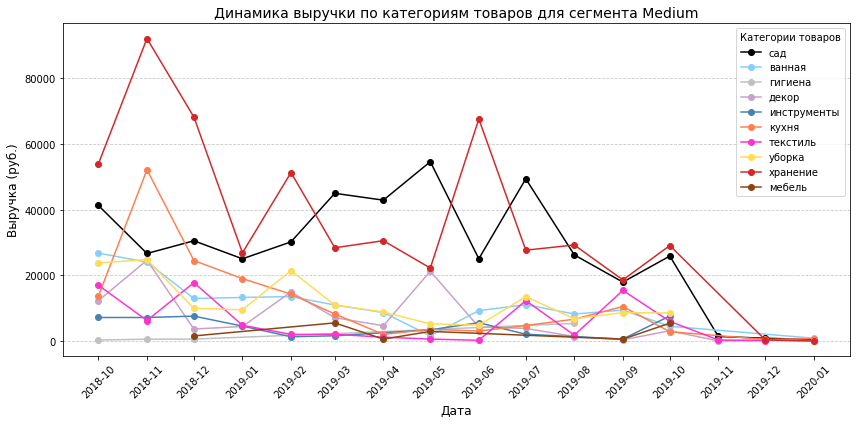

In [119]:
# Шаг 1: Группировка по году, месяцу и категории, расчёт общей выручки для сегмента Medium
medium_segment_revenue = df_1[df_1['Segment'] == 'Medium'].groupby(['year', 'month', 'category'])['total_price'].sum().reset_index()

# Шаг 2: Создаём новый столбец 'date' для объединения года и месяца
medium_segment_revenue['date'] = pd.to_datetime(medium_segment_revenue['year'].astype(str) + '-' +
                                                medium_segment_revenue['month'].astype(str))

# Шаг 3: Сортируем данные по дате
medium_segment_revenue = medium_segment_revenue.sort_values(by='date')

# Шаг 4: Визуализация выручки по категориям для сегмента Medium
plt.figure(figsize=(12, 6))

# Построение графиков для каждой категории с цветами
for category in medium_segment_revenue['category'].unique():
    category_data = medium_segment_revenue[medium_segment_revenue['category'] == category]
    plt.plot(
        category_data['date'],
        category_data['total_price'],
        marker='o',
        linestyle='-',
        label=category,
        color=category_colors.get(category, '#000000')  # Используем чёрный цвет по умолчанию для неизвестных категорий
    )

# Настройка оси X с датами
plt.xticks(
    medium_segment_revenue['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(),
    medium_segment_revenue['date'].dt.strftime('%Y-%m').drop_duplicates(),
    rotation=45
)

# Настройка графика
plt.title('Динамика выручки по категориям товаров для сегмента Medium', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Категории товаров')
plt.tight_layout()

# Отображение графика
plt.show()


**Вывод:**
На графике показана динамика выручки по категориям товаров для сегмента **Medium** за период с октября 2018 по январь 2020.

1. **Основные драйверы выручки**:
   - **Кухня** и **хранение** выделяются на фоне остальных категорий. Они демонстрируют значительные пики в октябре-ноябре 2018 и июне 2019, достигая более **80 000 руб.**. Однако затем наблюдается резкий спад до конца периода.
   - **Сад** также показывает умеренные подъемы в 2019 году, особенно в апреле-июле.

2. **Стабильные категории с низкой выручкой**:
   - Категории **ванная**, **гигиена**, **декор**, **инструменты**, и **текстиль** остаются на низком уровне на протяжении всего периода.
   - Ростов или значимых изменений в этих категориях не наблюдается.

3. **Спад в конце периода**:
   - Начиная с сентября 2019 года, все категории товаров демонстрируют спад выручки, что может быть связано с сезонными факторами или снижением спроса.

Таким образом, сегмент **Medium** характеризуется высокими пиками по ключевым категориям **кухня** и **хранение** в начале и середине периода, однако к концу периода наблюдается резкое снижение выручки во всех категориях.


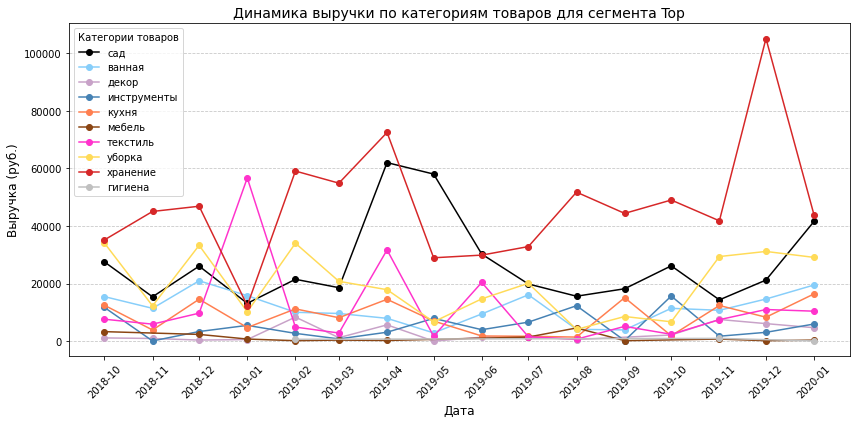

In [120]:
# Шаг 1: Группировка по году, месяцу и категории, расчёт общей выручки для сегмента Top
top_segment_revenue = df_1[df_1['Segment'] == 'Top'].groupby(['year', 'month', 'category'])['total_price'].sum().reset_index()

# Шаг 2: Создаём новый столбец 'date' для объединения года и месяца
top_segment_revenue['date'] = pd.to_datetime(top_segment_revenue['year'].astype(str) + '-' +
                                             top_segment_revenue['month'].astype(str))

# Шаг 3: Сортируем данные по дате
top_segment_revenue = top_segment_revenue.sort_values(by='date')

# Шаг 4: Визуализация выручки по категориям для сегмента Top
plt.figure(figsize=(12, 6))

# Построение графиков для каждой категории с цветами
for category in top_segment_revenue['category'].unique():
    category_data = top_segment_revenue[top_segment_revenue['category'] == category]
    plt.plot(
        category_data['date'],
        category_data['total_price'],
        marker='o',
        linestyle='-',
        label=category,
        color=category_colors.get(category, '#000000')  # Используем указанные цвета, чёрный для неизвестных категорий
    )

# Настройка оси X с датами
plt.xticks(
    top_segment_revenue['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(),
    top_segment_revenue['date'].dt.strftime('%Y-%m').drop_duplicates(),
    rotation=45
)

# Настройка графика
plt.title('Динамика выручки по категориям товаров для сегмента Top', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка (руб.)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Категории товаров')
plt.tight_layout()

# Отображение графика
plt.show()


**Вывод:**
На графике показана динамика выручки по категориям товаров для сегмента **Top** за период с октября 2018 по январь 2020.

1. **Основные драйверы выручки**:
   - **Хранение** и **сад** являются лидерами по выручке. 
     - **Хранение** показывает резкий пик в декабре 2019 (около **100 000 руб.**) и стабильные подъемы в начале и середине периода.
     - **Сад** демонстрирует высокие значения в апреле 2019 (~60 000 руб.) и рост в конце периода.
   - **Текстиль** также выделяется резкими пиками (январь 2019, апрель 2019).

2. **Умеренные категории**:
   - **Кухня**, **уборка**, и **мебель** показывают умеренные колебания выручки на уровне **20 000 - 40 000 руб.**, с наибольшими значениями в начале и середине периода.

3. **Низкий вклад**:
   - Категории **ванная**, **декор**, **инструменты** и **гигиена** имеют стабильную низкую выручку на протяжении всего периода.

4. **Всплеск в конце периода**:
   - В декабре 2019 и январе 2020 наблюдается значительный рост выручки в категориях **хранение** и **сад**, что может быть связано с сезонным спросом.

Таким образом, сегмент **Top** характеризуется высокими пиками выручки в категориях **хранение** и **сад**, а также кратковременными подъемами в других категориях.


ТОП товаров для каждого сегмента

In [121]:
# Группировка по сегменту и продукту, расчёт количества продаж и выручки
top_products_by_segment = df_1.groupby(['Segment', 'product']).agg({
    'quantity': 'sum',      # Общее количество проданных единиц
    'total_price': 'sum'    # Общая выручка
}).reset_index()

# Сортировка по сегменту и выручке (или количеству)
top_products_by_segment = top_products_by_segment.sort_values(by=['Segment', 'total_price'], ascending=[True, False])

# Получение ТОП-5 товаров для каждого сегмента
top_5_products = top_products_by_segment.groupby('Segment').head(5)


In [122]:
top_5_products

,Segment,product,quantity,total_price
121,Low,сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,4,"1,196"
119,Low,сумка для тележки большая комбинированная 45*30*25 1209021,3,"1,122"
146,Low,чехол eurogold reflector с металлизированной полосой поролон для досок 120х38-120x42 см dc42f3r,2,974
20,Low,гладильная доска ника дсп эконом 1065х29 эк1,2,898
77,Low,пеларгония зональная махровая лососевая,4,752
277,Medium,вешалки мягкие для деликатных вещей 3 шт шоколад,335,"49,596"
1301,Medium,сумка-тележка 2-х колесная gimi argo синяя,38,"40,736"
1459,Medium,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,59,"33,992"
743,Medium,муляж яблоко 9 см красное,618,"32,702"
775,Medium,набор ножей attribute chef 5 предметов akf522,64,"29,248"


## Проверим гипотезы

In [123]:
grouped_rfm_data.to_csv("grouped_rfm_data1812.csv", index=False)

Для сравнение средних подходит тест Манна-Уитни

Гипотеза 1: Средний чек отличается между сегментами клиентов\
H0 (нулевая гипотеза): Средний чек клиентов из сегмента A, сегмента Б и сегмента C не отличается (например, средний чек между всеми сегментами равен)\
H1 (альтернативная гипотеза): Средний чек клиентов из хотя бы одного сегмента отличается от других\

In [124]:
# средний чек (avg_order_value)
if 'avg_order_value' not in grouped_rfm_data.columns:
    avg_check_data = grouped_rfm_data.groupby('order_id')['total_price'].sum().reset_index()
    avg_check_data.rename(columns={'total_price': 'avg_order_value'}, inplace=True)
    grouped_rfm_data = grouped_rfm_data.merge(avg_check_data, on='order_id', how='left')

# Создаем массивы для хранения результатов
p_values = []
segment_pairs = []

# Уникальные сегменты
segments = grouped_rfm_data['Segment'].unique()

# Попарное сравнение всех сегментов
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        # Определяем сегменты для сравнения
        segment_1 = segments[i]
        segment_2 = segments[j]
        
        # Выбираем данные по каждому сегменту
        data_1 = grouped_rfm_data[grouped_rfm_data['Segment'] == segment_1]['total_price']
        data_2 = grouped_rfm_data[grouped_rfm_data['Segment'] == segment_2]['total_price']
        
        # Выполняем тест Манна-Уитни
        stat, p_value = mannwhitneyu(data_1, data_2, alternative='two-sided')
        
        # Сохраняем результаты
        p_values.append(p_value)
        segment_pairs.append(f'{segment_1} vs {segment_2}')

# Установка базового уровня значимости
alpha = 0.05

# Корректированный уровень значимости для поправки Бонферрони
corrected_alpha = alpha / len(p_values)

# Поправка на множественное тестирование (метод Бонферрони)
adjusted_p_values = multitest.multipletests(p_values, method='bonferroni')[1]

# Создание DataFrame с результатами
results = {
    "Сравнение сегментов": segment_pairs,
    "p-значение": p_values,
    "Скорректированное p-значение": adjusted_p_values,
    "Уровень значимости (Бонферрони)": corrected_alpha,
    "Результат": ["Отклоняем H0" if p < corrected_alpha else "Не отклоняем H0" for p in adjusted_p_values]
}

results_df = pd.DataFrame(results)

pd.set_option('display.float_format', '{:.6e}'.format)  # Научная нотация с 6 знаками после запятой
results_df

,Сравнение сегментов,p-значение,Скорректированное p-значение,Уровень значимости (Бонферрони),Результат
0,Medium vs Low,3.104734e-24,9.314201e-24,1.666667e-02,Отклоняем H0
1,Medium vs Top,1.883320e-03,5.649959e-03,1.666667e-02,Отклоняем H0
2,Low vs Top,6.731800e-14,2.019540e-13,1.666667e-02,Отклоняем H0


Нулевая гипотеза о равенстве средних значений отвергается для всех пар сегментов. Значит средний чек отличаеися

Гипотеза 2: Средняя Выручка отличается между сегментами клиентов\
H0 (нулевая гипотеза): Средняя  Выручка от клиентов из сегмента A, сегмента Б и сегмента C не отличается (например, выручка между всеми сегментами равен)\
H1 (альтернативная гипотеза): Средняя  Выручка клиентов из хотя бы одного сегмента отличается от других\

In [125]:
# Создаем массивы для хранения результатов
p_values_revenue = []
segment_pairs_revenue = []

# Попарное сравнение всех сегментов по выручке
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        # Определяем сегменты для сравнения
        segment_1 = segments[i]
        segment_2 = segments[j]
        
        # Выбираем данные по каждому сегменту (выручка = total_price)
        data_1 = grouped_rfm_data[grouped_rfm_data['Segment'] == segment_1]['total_price']
        data_2 = grouped_rfm_data[grouped_rfm_data['Segment'] == segment_2]['total_price']
        
        # Выполняем тест Манна-Уитни
        stat, p_value = mannwhitneyu(data_1, data_2, alternative='two-sided')
        
        # Сохраняем результаты
        p_values_revenue.append(p_value)
        segment_pairs_revenue.append(f'{segment_1} vs {segment_2}')

# Поправка на множественное тестирование (метод Бонферрони)
adjusted_p_values_revenue = multitest.multipletests(p_values_revenue, method='bonferroni')[1]

# Создание DataFrame с результатами
results_revenue = {
    "Сравнение сегментов": segment_pairs_revenue,
    "p-значение": p_values_revenue,
    "Скорректированное p-значение": adjusted_p_values_revenue,
    "Уровень значимости (Бонферрони)": corrected_alpha,
    "Результат": ["Отклоняем H0" if p < corrected_alpha else "Не отклоняем H0" for p in adjusted_p_values_revenue]
}

results_revenue_df = pd.DataFrame(results_revenue)

results_revenue_df

,Сравнение сегментов,p-значение,Скорректированное p-значение,Уровень значимости (Бонферрони),Результат
0,Medium vs Low,3.104734e-24,9.314201e-24,1.666667e-02,Отклоняем H0
1,Medium vs Top,1.883320e-03,5.649959e-03,1.666667e-02,Отклоняем H0
2,Low vs Top,6.731800e-14,2.019540e-13,1.666667e-02,Отклоняем H0


Для всех пар сегментов нулевая гипотеза отвергается.
Это подтверждает, что средняя выручка между сегментами клиентов статистически различается.

Гипотеза 3: Средняя стоимость товара отличается между сегментами\
H0 (нулевая гипотеза): Распределение среднего стоимости товаров одинаково для сегментов A, Б и C\
H1 (альтернативная гипотеза): Распределение средней стоимости товаров различается хотя бы в одном сегменте

In [126]:
# Создаем массивы для хранения результатов
p_values_price = []
segment_pairs_price = []

# Уникальные сегменты
segments_price = df_1['Segment'].unique()

# Попарное сравнение всех сегментов по цене
for i in range(len(segments_price)):
    for j in range(i + 1, len(segments_price)):
        # Определяем сегменты для сравнения
        segment_1 = segments_price[i]
        segment_2 = segments_price[j]
        
        # Выбираем данные по каждому сегменту (цена товара)
        data_1 = df_1[df_1['Segment'] == segment_1]['price']
        data_2 = df_1[df_1['Segment'] == segment_2]['price']
        
        # Выполняем тест Манна-Уитни
        stat, p_value = mannwhitneyu(data_1, data_2, alternative='two-sided')
        
        # Сохраняем результаты
        p_values_price.append(p_value)
        segment_pairs_price.append(f'{segment_1} vs {segment_2}')

# Поправка на множественное тестирование (метод Бонферрони)
adjusted_p_values_price = multitest.multipletests(p_values_price, method='bonferroni')[1]

# Корректированный уровень значимости
corrected_alpha_price = 0.05 / len(p_values_price)

# Создание DataFrame с результатами
results_price = {
    "Сравнение сегментов": segment_pairs_price,
    "p-значение": p_values_price,
    "Скорректированное p-значение": adjusted_p_values_price,
    "Уровень значимости (Бонферрони)": corrected_alpha_price,
    "Результат": ["Отклоняем H0" if p < corrected_alpha_price else "Не отклоняем H0" for p in adjusted_p_values_price]
}

results_price_df = pd.DataFrame(results_price)
results_price_df


,Сравнение сегментов,p-значение,Скорректированное p-значение,Уровень значимости (Бонферрони),Результат
0,Medium vs Low,1.954822e-05,5.864467e-05,1.666667e-02,Отклоняем H0
1,Medium vs Top,1.900181e-35,5.700542e-35,1.666667e-02,Отклоняем H0
2,Low vs Top,1.967609e-18,5.902827e-18,1.666667e-02,Отклоняем H0


Во всех парах сегментов нулевая гипотеза отклоняется.
Это подтверждает, что распределение средней стоимости товаров статистически различается между всеми сегментами.

## Рекомендации

Общий вывод

В ходе исследования была проведена глубокая аналитика данных интернет-магазина «Пока все ещё тут» за период с октября 2018 года по январь 2020 года. 

Основные результаты:

Динамика ключевых показателей:
- Выручка демонстрирует устойчивый нисходящий тренд на протяжении всего периода, что требует анализа причин и корректировки стратегии.
- Средний чек также снижается, особенно в сегментах с низкой и средней активностью клиентов, что может быть связано с изменением покупательского поведения или ассортимента товаров.
- Основной пик активности клиентов и выручки приходится на весенние месяцы и предновогодний период, что подтверждает выраженную сезонность спроса.

Анализ сегментов клиентов:
- Выделено три ключевых сегмента клиентов:
  - Top: Лояльные и высокодоходные клиенты, вносящие наибольший вклад в выручку. Однако их количество невелико, что делает сегмент уязвимым к потере клиентов.
  - Medium: Перспективный сегмент с потенциалом роста при правильной маркетинговой стратегии.
  - Low: Клиенты с низкой активностью, требующие дополнительных усилий для привлечения.
  
Анализ категорий товаров:
- Лидерами по выручке являются категории "Хранение" и "Сад", генерирующие более 50% общего дохода.
- Категории "Кухня" и "Уборка" показывают стабильный, но умеренный спрос.
- Остальные категории, такие как "Инструменты", "Мебель" и "Гигиена", имеют низкую долю выручки и требуют пересмотра ассортимента или маркетинговой стратегии.


Маркетинговые рекомендации

Персонализированные кампании:
- Использовать данные сегментации для создания персонализированных предложений: 
  - Скидки для сегмента Top.
  - Программы лояльности для Medium.
  - Акции для привлечения Low.
- Предлагать персонализированные наборы товаров из популярных категорий, таких как "Хранение" и "Сад".

Сезонные акции:
- Активно продвигать категории с ярко выраженной сезонностью ("Сад" и "Хранение") в весенне-летний период и перед праздниками.
- Создать акции «подготовка к праздникам» для увеличения продаж в декабре.

Повышение интереса к слабым категориям:
- Разработать промоакции для категорий с низкой выручкой ("Мебель", "Гигиена", "Инструменты") или добавить в них новые товары, основываясь на спросе.
- Продвигать менее популярные товары через комплекты с лидерами продаж.

Стратегия увеличения продаж

Оптимизация ассортимента:
- Сосредоточиться на категориях "Хранение" и "Сад", увеличив их ассортимент и доступность.
- Проанализировать спрос на товары из категорий с высокой средней стоимостью ("Инструменты") и расширить их предложение.

Увеличение среднего чека:
- Внедрить механизмы кросс-продаж: рекомендовать товары, дополняющие основной заказ.
- Предлагать скидки или бонусы при покупке на сумму выше определённого порога.


Работа с оптовыми клиентами:
- Создать отдельные предложения для крупных заказчиков, включая скидки и бесплатную доставку при больших объёмах покупок.

Стратегия повышения лояльности

Программы лояльности:
- Внедрить накопительные бонусные программы, позволяющие клиентам из сегментов Top и Medium накапливать баллы за каждую покупку.


Сегмент Top
- **Январь**: товары из категории "Хранение" (организация пространства после праздников) и "Текстиль" (обновление интерьера).
- **Февраль**: товары из категории "Кухня" (подготовка к кулинарным мероприятиям, подарочные наборы).
- **Март**: товары из категории "Сад" (начало подготовки к весеннему сезону).
- **Апрель**: товары из категории "Сад" и "Инструменты" (активная работа на участках).
- **Май**: товары из категории "Сад" и "Хранение" (организация летнего пространства).
- **Июнь**: товары из категории "Кухня" и "Сад" (пик пикников и сезонного отдыха).
- **Июль**: товары из категории "Уборка" (летняя уборка) и "Хранение" (подготовка к отпуску).
- **Август**: товары из категории "Хранение" и "Кухня" (подготовка к осеннему сезону).
- **Сентябрь**: товары из категории "Сад" и "Инструменты" (подготовка участков к зиме).
- **Октябрь**: товары из категории "Кухня" (консервирование, заготовки) и "Уборка" (генеральная уборка).
- **Ноябрь**: товары из категории "Хранение" (организация дома перед праздниками).
- **Декабрь**: товары из категории "Декор" и "Текстиль" (украшение дома и создание праздничной атмосферы).

Сегмент Medium
- **Январь**: товары из категории "Хранение" (приведение дома в порядок).
- **Февраль**: товары из категории "Кухня" и "Текстиль" (акции на полезные обновления).
- **Март**: товары из категории "Сад" (акции на подготовку к сезону).
- **Апрель**: товары из категории "Сад" и "Кухня" (предложения для дачи и дома).
- **Май**: товары из категории "Сад" и "Инструменты" (уход за участками).
- **Июнь**: товары из категории "Кухня" и "Гигиена" (летние бытовые потребности).
- **Июль**: товары из категории "Кухня" и "Уборка" (комплекты для сезонного использования).
- **Август**: товары из категории "Хранение" и "Текстиль" (подготовка к осеннему сезону).
- **Сентябрь**: товары из категории "Сад" и "Инструменты".
- **Октябрь**: товары из категории "Кухня" и "Хранение".
- **Ноябрь**: товары из категории "Хранение" (подготовка дома к праздникам).
- **Декабрь**: товары из категории "Декор" и "Кухня" (акции к праздникам).

Сегмент Low
- **Январь**: товары из категории "Хранение" (сезонные скидки).
- **Февраль**: товары из категории "Кухня" (акции и комплекты).
- **Март**: товары из категории "Сад" (вводные предложения для сезонных работ).
- **Апрель**: товары из категории "Сад" и "Уборка".
- **Май**: товары из категории "Сад" и "Гигиена" (акции для привлечения интереса).
- **Июнь**: товары из категории "Кухня" и "Текстиль".
- **Июль**: товары из категории "Уборка" (летние скидки).
- **Август**: товары из категории "Хранение" и "Инструменты".
- **Сентябрь**: товары из категории "Кухня" и "Гигиена".
- **Октябрь**: товары из категории "Хранение".
- **Ноябрь**: товары из категории "Хранение" и "Декор".
- **Декабрь**: товары из категории "Декор" и "Кухня".

Эти рекомендации позволят создать четко структурированную рекламную кампанию, направленную на интересы каждого сегмента клиентов, с учетом сезонных предпочтений.
